# Pipeline

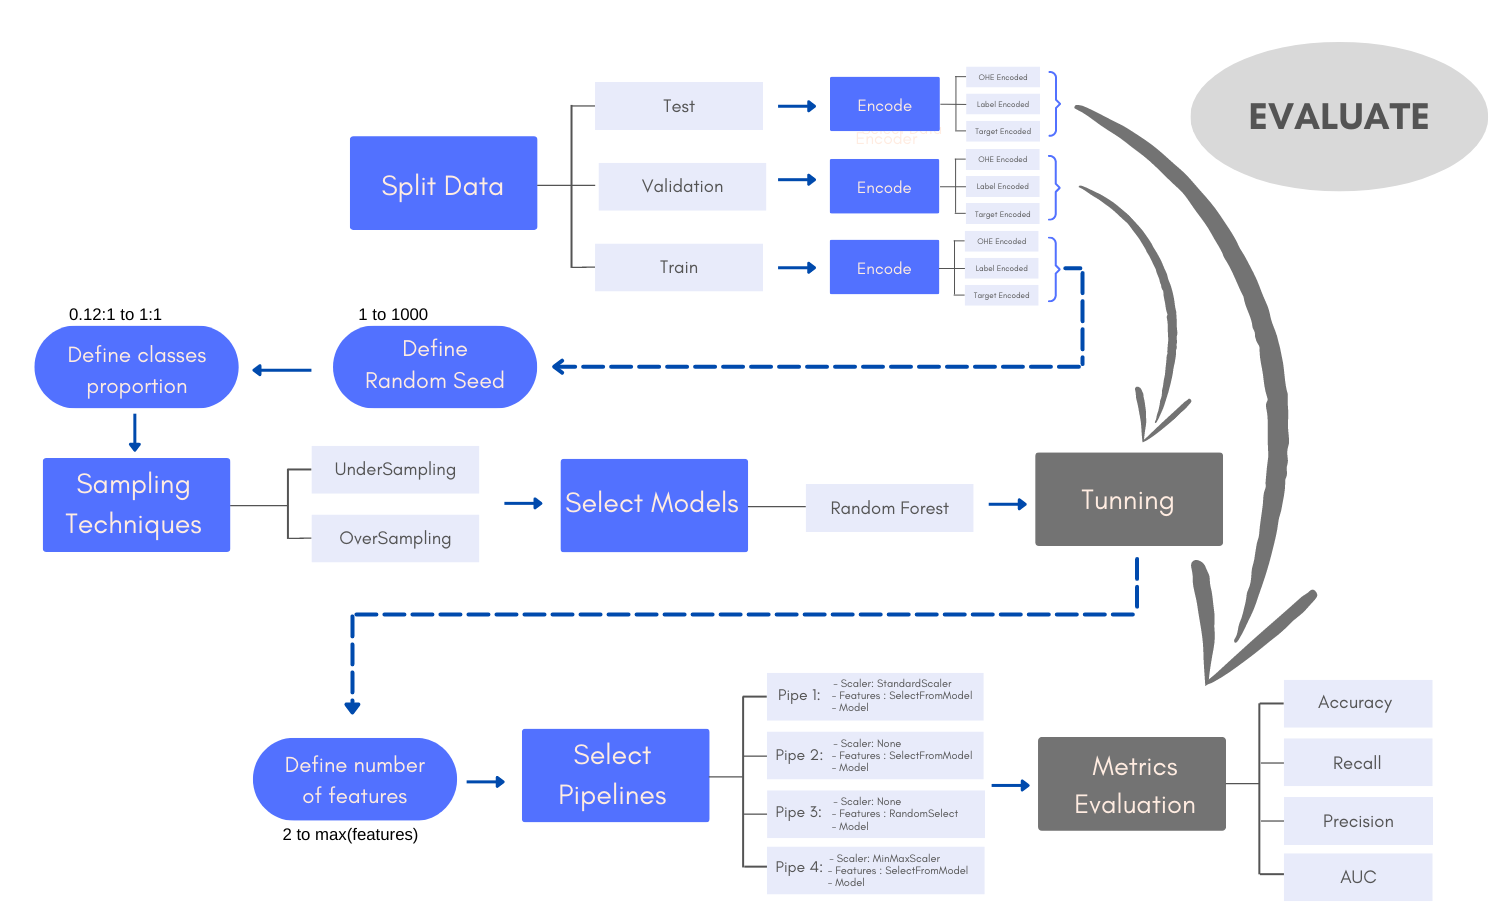

In [137]:
from IPython.display import Image
Image("Pipeline.png")

# Importação de Bibliotecas

In [50]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec


##########################
import pandas as pd
import numpy as np
#from pandas_profiling import ProfileReport


#Visualização de dados
#%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

#Scalers e encoders
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from category_encoders.one_hot import OneHotEncoder
from category_encoders.target_encoder import TargetEncoder


#Balanceamento de dados
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

# Prototipação
from lazypredict.Supervised import LazyClassifier


from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import PredefinedSplit



#ML
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1.0 Leitura dos arquivos

In [51]:
df = pd.read_csv('streamings.csv')
df.head()

Unnamed: 0  Position                          Track Name  \
0           0         1                  Recairei - Ao Vivo   
1           1         2       Basta Você Me Ligar - Ao Vivo   
2           2         3                    Amor ou o Litrão   
3           3         4  Meia Noite (Você tem meu Whatsapp)   
4           4         5                      Investe Em Mim   

                   Artist  Streams  \
0  Os Barões Da Pisadinha  1611265   
1  Os Barões Da Pisadinha  1263779   
2           Petter Ferraz  1181284   
3    Tarcísio do Acordeon  1100935   
4          Jonas Esticado  1052844   

                                                 URL        data  
0  https://open.spotify.com/track/2JTir3y1VuJQmex...  2021-01-01  
1  https://open.spotify.com/track/3rRin3LyLY92kpE...  2021-01-01  
2  https://open.spotify.com/track/7qmnP8Woc47dLSr...  2021-01-01  
3  https://open.spotify.com/track/6sPBi0qLI6KM3yX...  2021-01-01  
4  https://open.spotify.com/track/15k1TDabqSEmyXO...  2021-01-01

In [52]:
df_features = pd.read_csv('audio_features2.csv')
df_features

Unnamed: 0  danceability  energy  key  loudness  mode  speechiness  \
0              0          0.58    0.94   10     -2.12     1         0.09   
1              1          0.60    0.91    5     -2.42     0         0.06   
2              2          0.93    0.71    9     -4.21     1         0.06   
3              3          0.71    0.82   11     -4.79     0         0.03   
4              4          0.63    0.95    9     -1.28     1         0.03   
...          ...           ...     ...  ...       ...   ...          ...   
1713        1713          0.62    0.99    9     -2.53     1         0.23   
1714        1714          0.87    0.84   10     -1.93     1         0.09   
1715        1715          0.49    0.93    7     -1.82     1         0.07   
1716        1716          0.56    0.89    5     -2.95     0         0.09   
1717        1717          0.62    0.86    0     -3.00     1         0.24   

      acousticness  instrumentalness  liveness  ...  \
0             0.45              0.00      0.68  ...   
1             0.50              0.00      0.69  ...   
2             0.44              0.00      0.06  ...   
3             0.69              0.00      0.15  ...   
4             0.32              0.00      0.12  ...   
...            ...               ...       ...  ...   
1713          0.11              0.00      0.26  ...   
1714          0.53              0.00      0.04  ...   
1715          0.28              0.00      0.25  ...   
1716          0.47              0.00      0.89  ...   
1717          0.38              0.00      0.67  ...   

                                       uri  \
0     spotify:track:2JTir3y1VuJQmexiTCMcTP   
1     spotify:track:3rRin3LyLY92kpEbkCgwf4   
2     spotify:track:7qmnP8Woc47dLSrMD5MxL1   
3     spotify:track:6sPBi0qLI6KM3yXX56NxsA   
4     spotify:track:15k1TDabqSEmyXOwMq9RM7   
...                                    ...   
1713  spotify:track:6seovz6cwRWkN1NNAuE2gu   
1714  spotify:track:1OosuFhKograArfZ6JXedk   
1715  spotify:track:1Unc6luL5ueLO3t8I5YtpP   
1716  spotify:track:0FV4eVWzSAglihmcJPECiE   
1717  spotify:track:3mQ0yLH7gV8y7cNhTVRWkS   

                                             track_href  \
0     https://api.spotify.com/v1/tracks/2JTir3y1VuJQ...   
1     https://api.spotify.com/v1/tracks/3rRin3LyLY92...   
2     https://api.spotify.com/v1/tracks/7qmnP8Woc47d...   
3     https://api.spotify.com/v1/tracks/6sPBi0qLI6KM...   
4     https://api.spotify.com/v1/tracks/15k1TDabqSEm...   
...                                                 ...   
1713  https://api.spotify.com/v1/tracks/6seovz6cwRWk...   
1714  https://api.spotify.com/v1/tracks/1OosuFhKogra...   
1715  https://api.spotify.com/v1/tracks/1Unc6luL5ueL...   
1716  https://api.spotify.com/v1/tracks/0FV4eVWzSAgl...   
1717  https://api.spotify.com/v1/tracks/3mQ0yLH7gV8y...   

                                           analysis_url duration_ms  \
0     https://api.spotify.com/v1/audio-analysis/2JTi...      166838   
1     https://api.spotify.com/v1/audio-analysis/3rRi...      182977   
2     https://api.spotify.com/v1/audio-analysis/7qmn...      173913   
3     https://api.spotify.com/v1/audio-analysis/6sPB...      237900   
4     https://api.spotify.com/v1/audio-analysis/15k1...      186533   
...                                                 ...         ...   
1713  https://api.spotify.com/v1/audio-analysis/6seo...      268160   
1714  https://api.spotify.com/v1/audio-analysis/1Oos...      129240   
1715  https://api.spotify.com/v1/audio-analysis/1Unc...      175291   
1716  https://api.spotify.com/v1/audio-analysis/0FV4...      144982   
1717  https://api.spotify.com/v1/audio-analysis/3mQ0...      160858   

     time_signature                                                URL  \
0                 4  https://open.spotify.com/track/2JTir3y1VuJQmex...   
1                 4  https://open.spotify.com/track/3rRin3LyLY92kpE...   
2                 4  https://open.spotify.com/track/7qmnP8Woc47dLSr...   
3                 4  

# 2.0 Pré-processamento

Métrica de popularidade:
- Medir a popularidade diária numero de streams / numero de streams do top 200 do dia
- dividir a popularidade de todas as musicas pela maior popularidade do dia

- Achar data primeiro registro para cada musica
- fazer a média em 4 meses.

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97000 entries, 0 to 96999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  97000 non-null  int64 
 1   Position    97000 non-null  int64 
 2   Track Name  96978 non-null  object
 3   Artist      96978 non-null  object
 4   Streams     97000 non-null  int64 
 5   URL         97000 non-null  object
 6   data        97000 non-null  object
dtypes: int64(3), object(4)
memory usage: 5.2+ MB


## 2.1 Transformando a coluna de data

In [54]:
df['data'] = df['data'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').date())

In [55]:
#df = df.astype({"data":'date'})

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97000 entries, 0 to 96999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  97000 non-null  int64 
 1   Position    97000 non-null  int64 
 2   Track Name  96978 non-null  object
 3   Artist      96978 non-null  object
 4   Streams     97000 non-null  int64 
 5   URL         97000 non-null  object
 6   data        97000 non-null  object
dtypes: int64(3), object(4)
memory usage: 5.2+ MB


## 2.2 Coletando informações total de streams diárias e número de streams máximo diário.

In [57]:
lista_datas = df.data.unique()
l_datas = list(lista_datas)
l_datas
len(l_datas)

485

In [58]:
# Gravando o total de streams ocorridas diariamente
stream_diaria = []
maxima_stream_diaria = []

for i in l_datas:
    
    stream_diaria.append(df[(df['data']== i)].Streams.sum() )  
    maxima_stream_diaria.append( df[(df['data']== i)].Streams.max() )
    
    
df_aux = pd.DataFrame(list(zip(l_datas, stream_diaria,maxima_stream_diaria )),
               columns =['data', 'stream_diaria', 'maxima_dia'])
df_aux.head()

data  stream_diaria  maxima_dia
0  2021-01-01       64826108     1611265
1  2021-01-02       43141064      873301
2  2021-01-03       41664509      806828
3  2021-01-04       34807998      717103
4  2021-01-05       34675953      715246

In [59]:
df = df.merge(df_aux, how='left', on='data')
df.head()

Unnamed: 0  Position                          Track Name  \
0           0         1                  Recairei - Ao Vivo   
1           1         2       Basta Você Me Ligar - Ao Vivo   
2           2         3                    Amor ou o Litrão   
3           3         4  Meia Noite (Você tem meu Whatsapp)   
4           4         5                      Investe Em Mim   

                   Artist  Streams  \
0  Os Barões Da Pisadinha  1611265   
1  Os Barões Da Pisadinha  1263779   
2           Petter Ferraz  1181284   
3    Tarcísio do Acordeon  1100935   
4          Jonas Esticado  1052844   

                                                 URL        data  \
0  https://open.spotify.com/track/2JTir3y1VuJQmex...  2021-01-01   
1  https://open.spotify.com/track/3rRin3LyLY92kpE...  2021-01-01   
2  https://open.spotify.com/track/7qmnP8Woc47dLSr...  2021-01-01   
3  https://open.spotify.com/track/6sPBi0qLI6KM3yX...  2021-01-01   
4  https://open.spotify.com/track/15k1TDabqSEmyXO...  2021-01-01   

   stream_diaria  maxima_dia  
0       64826108     1611265  
1       64826108     1611265  
2       64826108     1611265  
3       64826108     1611265  
4       64826108     1611265

## 2.3 Calculando popularidade normalizada diária

In [60]:
df['popularidade_diaria_norm'] = df['Streams']/df['maxima_dia']
df.head()

Unnamed: 0  Position                          Track Name  \
0           0         1                  Recairei - Ao Vivo   
1           1         2       Basta Você Me Ligar - Ao Vivo   
2           2         3                    Amor ou o Litrão   
3           3         4  Meia Noite (Você tem meu Whatsapp)   
4           4         5                      Investe Em Mim   

                   Artist  Streams  \
0  Os Barões Da Pisadinha  1611265   
1  Os Barões Da Pisadinha  1263779   
2           Petter Ferraz  1181284   
3    Tarcísio do Acordeon  1100935   
4          Jonas Esticado  1052844   

                                                 URL        data  \
0  https://open.spotify.com/track/2JTir3y1VuJQmex...  2021-01-01   
1  https://open.spotify.com/track/3rRin3LyLY92kpE...  2021-01-01   
2  https://open.spotify.com/track/7qmnP8Woc47dLSr...  2021-01-01   
3  https://open.spotify.com/track/6sPBi0qLI6KM3yX...  2021-01-01   
4  https://open.spotify.com/track/15k1TDabqSEmyXO...  2021-01-01   

   stream_diaria  maxima_dia  popularidade_diaria_norm  
0       64826108     1611265                      1.00  
1       64826108     1611265                      0.78  
2       64826108     1611265                      0.73  
3       64826108     1611265                      0.68  
4       64826108     1611265                      0.65

## 2.4 Calculando popularidade média em 4 meses após a entrada nos charts do spotify.

Será registrado apenas as músicas que entraram no charts pela primeira vez em 2021.  
Será contabilizado como 0 streams diário as músicas que entraram em algum momento nos charts do spotify mas não permaneceram no dia considerado

In [61]:
##Definindo lista de musicas unicas
lista_musicas = df.URL.unique()
l_musicas = list(lista_musicas)
l_musicas
len(l_musicas)

1719

In [62]:
#Definindo a janela para 4 meses (120 dias)
n_days = 120
diferenca = timedelta(n_days)
diferenca

datetime.timedelta(days=120)

In [63]:
#Criando looping para calcular a popularidade nos 4 primeiros meses que a musica entrou nos charts
popularidade_media_4m = []
desv_pad_4m = []
l_data_entrada =[]
l_data_final =[]
numero_registros = []

for i in l_musicas:
    
    #Data de entrada no charts
    data_entrada = df[(df['URL']== i)].data.min()

    
    #Data final a considerar o calculo (+120 dias)
    data_final_calculo = data_entrada + diferenca
    
    #Registrar estatísticas apenas caso a musica tenha dado entrada nos charts no ano de 2021.
    if data_entrada.year == 2021:
        
        l_data_entrada.append(data_entrada)
        l_data_final.append(data_final_calculo)
        
        df_filtro = df[(df['data']>= data_entrada) & (df['data']<= data_final_calculo) & (df['URL']== i)]
        
        n_reg = len(df_filtro)
        
        # É contabilizado como 0 streams o dia em que não há registro no top200 do charts, por isso se aplica o fator *n_reg/n_days
        pop_media = df_filtro.popularidade_diaria_norm.mean()*n_reg/n_days
        desv_pad = df_filtro.popularidade_diaria_norm.std()
    
        #Registrando as estatisticas
        popularidade_media_4m.append(pop_media)
        desv_pad_4m.append(desv_pad)
        numero_registros.append(n_reg)


# Transformando em dataframe:
df_aux = pd.DataFrame(list(zip(l_musicas,l_data_entrada,l_data_final,numero_registros, popularidade_media_4m,desv_pad_4m )),
               columns =['URL', 'data_entrada_charts','data_final_4m','n_registros','pop_media_4m', 'pop_desvpad_4m'])
df_aux

URL data_entrada_charts  \
0     https://open.spotify.com/track/2JTir3y1VuJQmex...          2021-01-01   
1     https://open.spotify.com/track/3rRin3LyLY92kpE...          2021-01-01   
2     https://open.spotify.com/track/7qmnP8Woc47dLSr...          2021-01-01   
3     https://open.spotify.com/track/6sPBi0qLI6KM3yX...          2021-01-01   
4     https://open.spotify.com/track/15k1TDabqSEmyXO...          2021-01-01   
...                                                 ...                 ...   
1377  https://open.spotify.com/track/7MJiZazhXeWZoFZ...          2021-12-29   
1378  https://open.spotify.com/track/2AQJRDfQJbfgmTf...          2021-12-31   
1379  https://open.spotify.com/track/67MzL6NnggPqvBf...          2021-12-31   
1380  https://open.spotify.com/track/7uHVSsfgVm7FpG7...          2021-12-31   
1381  https://open.spotify.com/track/1TFqH3zKOiTZoVe...          2021-12-31   

     data_final_4m  n_registros  pop_media_4m  pop_desvpad_4m  
0       2021-05-01          121          0.51            0.24  
1       2021-05-01          121          0.47            0.17  
2       2021-05-01          121          0.37            0.23  
3       2021-05-01          121          0.62            0.25  
4       2021-05-01          121          0.40            0.18  
...            ...          ...           ...             ...  
1377    2022-04-28           58          0.04            0.01  
1378    2022-04-30          121          0.26            0.05  
1379    2022-04-30            3          0.00            0.01  
1380    2022-04-30           55          0.04            0.01  
1381    2022-04-30           36          0.03            0.02  

[1382 rows x 6 columns]

Das 1719 músicas coletadas apenas 1382 apareceram nos charts de 2021.

## 2.5 Investigando valores nulos para desvio padrão da popularidade média de 4 meses

In [64]:
df_aux.isnull().sum()

URL                      0
data_entrada_charts      0
data_final_4m            0
n_registros              0
pop_media_4m             0
pop_desvpad_4m         224
dtype: int64

In [65]:
bool_series = pd.isnull(df_aux["pop_desvpad_4m"])

In [66]:
df_aux[bool_series] 

URL data_entrada_charts  \
112   https://open.spotify.com/track/4i9uK1cMwP1Pc5z...          2021-01-01   
141   https://open.spotify.com/track/4nyQshn0cfaRvvn...          2021-01-01   
147   https://open.spotify.com/track/2Zrcs0ePEBsZhsD...          2021-01-01   
151   https://open.spotify.com/track/2bPtwnrpFNEe8N7...          2021-01-01   
159   https://open.spotify.com/track/0gtf3d3byB1LJB8...          2021-01-01   
...                                                 ...                 ...   
1341  https://open.spotify.com/track/2ZbYyDM0pacTwP2...          2021-12-13   
1352  https://open.spotify.com/track/58ySh8QZ67IDkD2...          2021-12-17   
1363  https://open.spotify.com/track/0lizgQ7Qw35od7C...          2021-12-24   
1365  https://open.spotify.com/track/0lLdorYw7lVrJyd...          2021-12-24   
1373  https://open.spotify.com/track/4Z20Nlp53CuArds...          2021-12-25   

     data_final_4m  n_registros  pop_media_4m  pop_desvpad_4m  
112     2021-05-01            1          0.00             nan  
141     2021-05-01            1          0.00             nan  
147     2021-05-01            1          0.00             nan  
151     2021-05-01            1          0.00             nan  
159     2021-05-01            1          0.00             nan  
...            ...          ...           ...             ...  
1341    2022-04-12            1          0.00             nan  
1352    2022-04-16            1          0.00             nan  
1363    2022-04-23            1          0.00             nan  
1365    2022-04-23            1          0.00             nan  
1373    2022-04-24            1          0.00             nan  

[224 rows x 6 columns]

In [67]:
df_aux[bool_series].n_registros.value_counts()

1    224
Name: n_registros, dtype: int64

O desvio padrão de popularidade nula ocorreu para musicas com apenas 1 registro na janela específicada.  
A média de popularidade, dessa forma, tende a ser baixa conforme o esperado.

## 2.6 Concatenando caractéristicas e popularidade de músicas
* Características extraidas da WebAPI do Spotify: https://developer.spotify.com/documentation/web-api/reference/#/operations/get-track
* Popularidade calculada de acordo com charts top200 diário do spotify. https://spotifycharts.com/regional/br/daily/latest


In [68]:
df_final = df_features.merge(df_aux, how='left', on='URL')
df_final

Unnamed: 0  danceability  energy  key  loudness  mode  speechiness  \
0              0          0.58    0.94   10     -2.12     1         0.09   
1              1          0.60    0.91    5     -2.42     0         0.06   
2              2          0.93    0.71    9     -4.21     1         0.06   
3              3          0.71    0.82   11     -4.79     0         0.03   
4              4          0.63    0.95    9     -1.28     1         0.03   
...          ...           ...     ...  ...       ...   ...          ...   
1713        1713          0.62    0.99    9     -2.53     1         0.23   
1714        1714          0.87    0.84   10     -1.93     1         0.09   
1715        1715          0.49    0.93    7     -1.82     1         0.07   
1716        1716          0.56    0.89    5     -2.95     0         0.09   
1717        1717          0.62    0.86    0     -3.00     1         0.24   

      acousticness  instrumentalness  liveness  ...  \
0             0.45              0.00      0.68  ...   
1             0.50              0.00      0.69  ...   
2             0.44              0.00      0.06  ...   
3             0.69              0.00      0.15  ...   
4             0.32              0.00      0.12  ...   
...            ...               ...       ...  ...   
1713          0.11              0.00      0.26  ...   
1714          0.53              0.00      0.04  ...   
1715          0.28              0.00      0.25  ...   
1716          0.47              0.00      0.89  ...   
1717          0.38              0.00      0.67  ...   

                                                    URL  popularidade_cantor  \
0     https://open.spotify.com/track/2JTir3y1VuJQmex...                   70   
1     https://open.spotify.com/track/3rRin3LyLY92kpE...                   70   
2     https://open.spotify.com/track/7qmnP8Woc47dLSr...                   41   
3     https://open.spotify.com/track/6sPBi0qLI6KM3yX...                   70   
4     https://open.spotify.com/track/15k1TDabqSEmyXO...                   57   
...                                                 ...                  ...   
1713  https://open.spotify.com/track/6seovz6cwRWkN1N...                   92   
1714  https://open.spotify.com/track/1OosuFhKograArf...                   61   
1715  https://open.spotify.com/track/1Unc6luL5ueLO3t...                   54   
1716  https://open.spotify.com/track/0FV4eVWzSAglihm...                   66   
1717  https://open.spotify.com/track/3mQ0yLH7gV8y7cN...                   46   

     seguidores_cantor                                      genero_cantor  \
0              6220557                            arrocha, forro, piseiro   
1              6220557                            arrocha, forro, piseiro   
2                17837                                                NaN   
3              2665488                                            arrocha   
4              1629840  arrocha, forro, sertanejo, sertanejo pop, sert...   
...                ...                                                ...   
1713          52035117                             k-pop, k-pop boy group   
1714             21191                                       arrochadeira   
1715            194457                       arrochadeira, forro, piseiro   
1716           5264246  funk carioca, pop nacional, sertanejo, sertane...   
1717            326928                                      sertanejo pop   

     genero_primario_cantor data_entrada_charts data_final_4m  n_registros  \
0                   arrocha          2021-01-01    2021-05-01       121.00   
1                   arrocha          2021-01-01    2021-05-01       121.00   
2                       NaN          2021-01-01    2021-05-01       121.00   
3                   arrocha          2021-01-01    2021-05-01       121.00   
4                   arrocha          2021-01-01    2021-05-01       121.00   
...                     ...                 ...           ...          ...   


Exclusão das músicas que entraram nos charts após 2021. Essas musicas não possuem popularidade calculada então:

In [69]:
df_final = df_final.dropna(subset=['pop_media_4m'])
df_final

Unnamed: 0  danceability  energy  key  loudness  mode  speechiness  \
0              0          0.58    0.94   10     -2.12     1         0.09   
1              1          0.60    0.91    5     -2.42     0         0.06   
2              2          0.93    0.71    9     -4.21     1         0.06   
3              3          0.71    0.82   11     -4.79     0         0.03   
4              4          0.63    0.95    9     -1.28     1         0.03   
...          ...           ...     ...  ...       ...   ...          ...   
1376        1376          0.83    0.62    1     -0.86     0         0.20   
1377        1377          0.61    0.66    5     -5.17     0         0.13   
1378        1378          0.81    0.70    7     -7.15     1         0.06   
1379        1379          0.94    0.75    2     -2.80     1         0.10   
1380        1380          0.41    0.83    2     -6.06     1         0.06   

      acousticness  instrumentalness  liveness  ...  \
0             0.45              0.00      0.68  ...   
1             0.50              0.00      0.69  ...   
2             0.44              0.00      0.06  ...   
3             0.69              0.00      0.15  ...   
4             0.32              0.00      0.12  ...   
...            ...               ...       ...  ...   
1376          0.19              0.03      0.12  ...   
1377          0.16              0.00      0.10  ...   
1378          0.07              0.00      0.07  ...   
1379          0.15              0.00      0.07  ...   
1380          0.62              0.00      0.33  ...   

                                                    URL  popularidade_cantor  \
0     https://open.spotify.com/track/2JTir3y1VuJQmex...                   70   
1     https://open.spotify.com/track/3rRin3LyLY92kpE...                   70   
2     https://open.spotify.com/track/7qmnP8Woc47dLSr...                   41   
3     https://open.spotify.com/track/6sPBi0qLI6KM3yX...                   70   
4     https://open.spotify.com/track/15k1TDabqSEmyXO...                   57   
...                                                 ...                  ...   
1376  https://open.spotify.com/track/7MJiZazhXeWZoFZ...                   51   
1377  https://open.spotify.com/track/2AQJRDfQJbfgmTf...                   75   
1378  https://open.spotify.com/track/67MzL6NnggPqvBf...                   66   
1379  https://open.spotify.com/track/7uHVSsfgVm7FpG7...                   49   
1380  https://open.spotify.com/track/1TFqH3zKOiTZoVe...                   71   

     seguidores_cantor                                      genero_cantor  \
0              6220557                            arrocha, forro, piseiro   
1              6220557                            arrocha, forro, piseiro   
2                17837                                                NaN   
3              2665488                                            arrocha   
4              1629840  arrocha, forro, sertanejo, sertanejo pop, sert...   
...                ...                                                ...   
1376              6640                                           funk mtg   
1377           5429554      r&b brasileiro, rap cearense, trap brasileiro   
1378             89158                                          rave funk   
1379             91351                              arrocha, arrochadeira   
1380           1894024                                pagode, pagode novo   

     genero_primario_cantor data_entrada_charts data_final_4m  n_registros  \
0                   arrocha          2021-01-01    2021-05-01       121.00   
1                   arrocha          2021-01-01    2021-05-01       121.00   
2                       NaN          2021-01-01    2021-05-01       121.00   
3                   arrocha          2021-01-01    2021-05-01       121.00   
4                   arrocha          2021-01-01    2021-05-01       121.00   
...                     ...                 ...           ...          ...   


## 2.7 Checando valores nulos no dataframe final:

In [70]:
df_final.isnull().sum()

Unnamed: 0                  0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
type                        0
id                          0
uri                         0
track_href                  0
analysis_url                0
duration_ms                 0
time_signature              0
URL                         0
popularidade_cantor         0
seguidores_cantor           0
genero_cantor              49
genero_primario_cantor     49
data_entrada_charts         0
data_final_4m               0
n_registros                 0
pop_media_4m                0
pop_desvpad_4m            223
dtype: int64

## 2.8 Estatísticas descritivas

In [71]:
df_final.describe()

Unnamed: 0  danceability  energy     key  loudness    mode  \
count     1381.00       1381.00 1381.00 1381.00   1381.00 1381.00   
mean       690.00          0.67    0.68    5.36     -5.62    0.56   
std        398.80          0.13    0.17    3.55      2.66    0.50   
min          0.00          0.16    0.02    0.00    -28.32    0.00   
25%        345.00          0.59    0.56    2.00     -7.00    0.00   
50%        690.00          0.67    0.70    6.00     -5.26    1.00   
75%       1035.00          0.76    0.81    8.00     -3.85    1.00   
max       1380.00          0.96    0.99   11.00      1.91    1.00   

       speechiness  acousticness  instrumentalness  liveness  valence   tempo  \
count      1381.00       1381.00           1381.00   1381.00  1381.00 1381.00   
mean          0.11          0.34              0.01      0.24     0.62  130.03   
std           0.11          0.24              0.07      0.23     0.23   28.63   
min           0.02          0.00              0.00      0.01     0.03   52.99   
25%           0.04          0.15              0.00      0.10     0.45  109.99   
50%           0.06          0.32              0.00      0.13     0.64  130.00   
75%           0.12          0.52              0.00      0.31     0.81  153.25   
max           0.88          0.97              0.97      0.99     0.97  204.32   

       duration_ms  time_signature  popularidade_cantor  seguidores_cantor  \
count      1381.00         1381.00              1381.00            1381.00   
mean     189727.00            3.99                69.86        11419972.41   
std       60175.07            0.28                13.26        17523306.66   
min       37801.00            1.00                 0.00             115.00   
25%      158531.00            4.00                62.00          678714.00   
50%      177813.00            4.00                70.00         3331767.00   
75%      206182.00            4.00                80.00        16376285.00   
max      744727.00            5.00               100.00        99612041.00   

       n_registros  pop_media_4m  pop_desvpad_4m  
count      1381.00       1381.00         1158.00  
mean         45.53          0.09            0.05  
std          46.46          0.14            0.05  
min           1.00          0.00            0.00  
25%           3.00          0.00            0.01  
50%          23.00          0.02            0.03  
75%          91.00          0.11            0.06  
max         121.00          0.82            0.33

# 3.0 Analise de dados e definição de musicas populares

Como definir uma musica popular?  
 - Classificar musicas popularidade em 25,50,75,100 percentis e verificar o comportamento da popularidade normalizada ao longo do tempo nas charts.  
 
 Gráfico de distribuição popularidade de musicas;  
 Distribuição caracteristicas de acordo com o que considerar popular (labels)  


## 3.1 Correlação

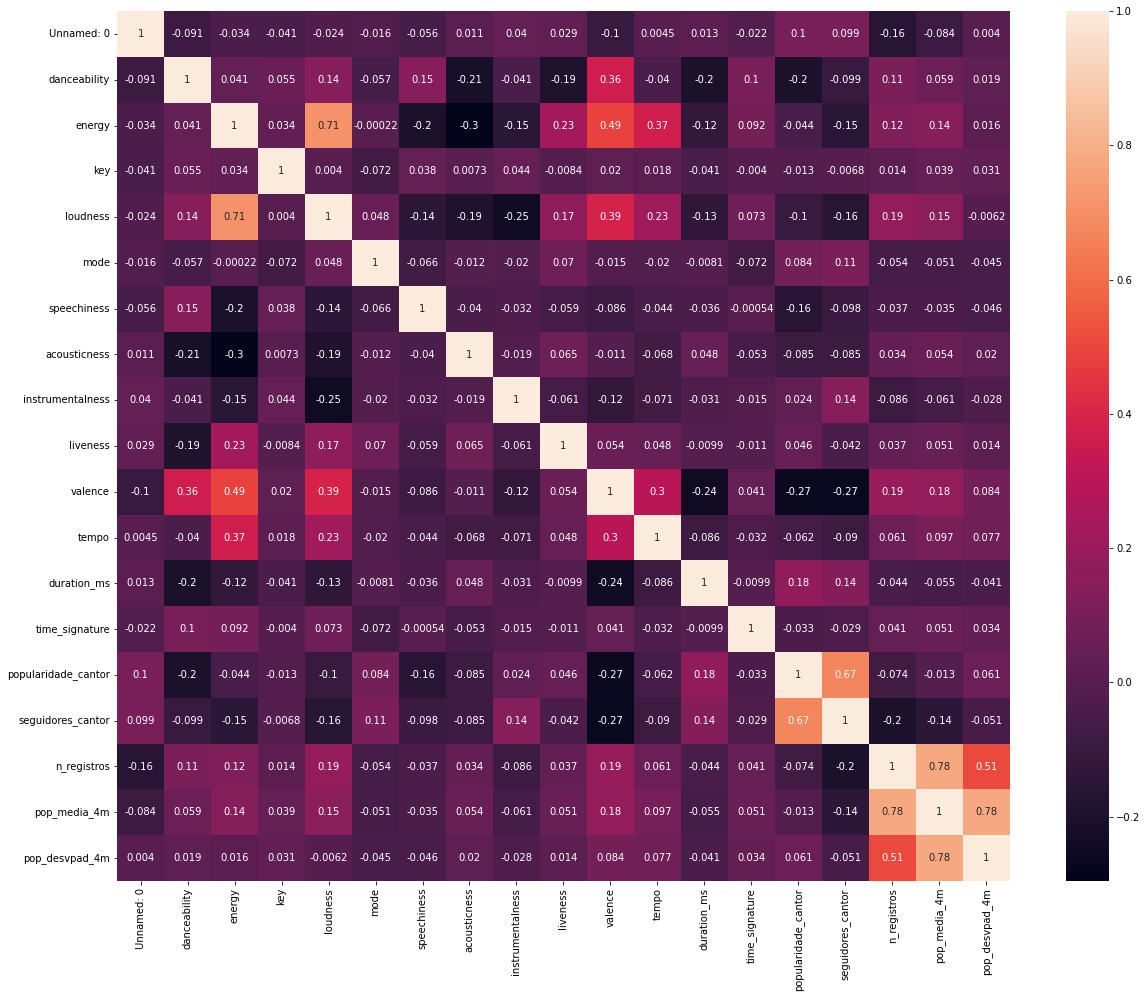

In [72]:
plt.figure(figsize=(20,16))
sns.heatmap(df_final.corr(),annot=True)
plt.show()

Há baixa correlação entre a variável alvo e as características, sendo o máximo observado de 0.19 entre popularidade e valence da música;

É importante ressaltar que as variáveis "n_registros" e "desv_pad" da popularidade foram calculados a partir dos charts do spotify, portanto, não será usado no modelo.

## 3.2 Quartis e percentis

In [73]:
print('Quartil 25%: {}' .format(df_final.quantile(0.25, numeric_only=True).pop_media_4m));
print('Quartil 50%: {}' .format(df_final.quantile(0.5, numeric_only=True).pop_media_4m));
print('Quartil 75%: {}' .format(df_final.quantile(0.75, numeric_only=True).pop_media_4m));
print('Percentil 90%: {}' .format(df_final.quantile(0.9, numeric_only=True).pop_media_4m));

Quartil 25%: 0.0031375944094730415
Quartil 50%: 0.024036977377076194
Quartil 75%: 0.1102641089322164
Percentil 90%: 0.25711297294115504


1º Quartil: pop <= 0.0031375944094730415;  
2º Quartil: 0.0031375944094730415 < pop <= 0.024036977377076194;  
3º Quartil: 0.024036977377076194 < pop <= 0.1102641089322164;  
4º Quartil: pop > 0.1102641089322164

## 3.3 Definição de musica popular: Percentil 90%

Definiremos o percentil de 90% como musicas populares com label = 1

In [74]:
df_analise = df_final.copy()
df_analise['classe'] = 'NaN'

for index, row in df_analise.iterrows():
        
    #if row['pop_media_4m'] <= 0.0031375944094730415:
        #df_analise.loc[index,'classe'] =  0
   #elif row['pop_media_4m'] > 0.0031375944094730415 and row['pop_media_4m'] <= 0.024036977377076194:
        #df_analise.loc[index,'classe'] =  0
    #elif row['pop_media_4m'] > 0.024036977377076194 and row['pop_media_4m'] <= 0.1102641089322164:
        #df_analise.loc[index,'classe'] =  0
    #elif row['pop_media_4m'] > 0.1102641089322164:
        #df_analise.loc[index,'classe'] =  1
        
    if row['pop_media_4m'] >= 0.25711297294115504:
        df_analise.loc[index,'classe'] =  1
    else:
        df_analise.loc[index,'classe'] =  0
         
df_analise

Unnamed: 0  danceability  energy  key  loudness  mode  speechiness  \
0              0          0.58    0.94   10     -2.12     1         0.09   
1              1          0.60    0.91    5     -2.42     0         0.06   
2              2          0.93    0.71    9     -4.21     1         0.06   
3              3          0.71    0.82   11     -4.79     0         0.03   
4              4          0.63    0.95    9     -1.28     1         0.03   
...          ...           ...     ...  ...       ...   ...          ...   
1376        1376          0.83    0.62    1     -0.86     0         0.20   
1377        1377          0.61    0.66    5     -5.17     0         0.13   
1378        1378          0.81    0.70    7     -7.15     1         0.06   
1379        1379          0.94    0.75    2     -2.80     1         0.10   
1380        1380          0.41    0.83    2     -6.06     1         0.06   

      acousticness  instrumentalness  liveness  ...  popularidade_cantor  \
0             0.45              0.00      0.68  ...                   70   
1             0.50              0.00      0.69  ...                   70   
2             0.44              0.00      0.06  ...                   41   
3             0.69              0.00      0.15  ...                   70   
4             0.32              0.00      0.12  ...                   57   
...            ...               ...       ...  ...                  ...   
1376          0.19              0.03      0.12  ...                   51   
1377          0.16              0.00      0.10  ...                   75   
1378          0.07              0.00      0.07  ...                   66   
1379          0.15              0.00      0.07  ...                   49   
1380          0.62              0.00      0.33  ...                   71   

      seguidores_cantor                                      genero_cantor  \
0               6220557                            arrocha, forro, piseiro   
1               6220557                            arrocha, forro, piseiro   
2                 17837                                                NaN   
3               2665488                                            arrocha   
4               1629840  arrocha, forro, sertanejo, sertanejo pop, sert...   
...                 ...                                                ...   
1376               6640                                           funk mtg   
1377            5429554      r&b brasileiro, rap cearense, trap brasileiro   
1378              89158                                          rave funk   
1379              91351                              arrocha, arrochadeira   
1380            1894024                                pagode, pagode novo   

     genero_primario_cantor data_entrada_charts data_final_4m n_registros  \
0                   arrocha          2021-01-01    2021-05-01      121.00   
1                   arrocha          2021-01-01    2021-05-01      121.00   
2                       NaN          2021-01-01    2021-05-01      121.00   
3                   arrocha          2021-01-01    2021-05-01      121.00   
4                   arrocha          2021-01-01    2021-05-01      121.00   
...                     ...                 ...           ...         ...   
1376               funk mtg          2021-12-29    2022-04-28       58.00   
1377         r&b brasileiro          2021-12-31    2022-04-30      121.00   
1378              rave funk          2021-12-31    2022-04-30        3.00   
1379                arrocha          2021-12-31    2022-04-30       55.00   
1380                 pagode          2021-12-31    2022-04-30       36.00   

      pop_media_4m  pop_desvpad_4m classe  
0             0.51            0.24      1  
1             0.47            0.17      1  
2             0.37            0.23      1  
3             0.62            0.25      1  
4             0.40            0.18      1  
...            ...             ...    ...  
1376      

In [75]:
df_analise['classe'].value_counts()

0    1242
1     139
Name: classe, dtype: int64

139 musicas serão consideradas populares

# 3.4 Histogramas

In [76]:
df_analise.columns

Index(['Unnamed: 0', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature', 'URL', 'popularidade_cantor',
       'seguidores_cantor', 'genero_cantor', 'genero_primario_cantor',
       'data_entrada_charts', 'data_final_4m', 'n_registros', 'pop_media_4m',
       'pop_desvpad_4m', 'classe'],
      dtype='object')

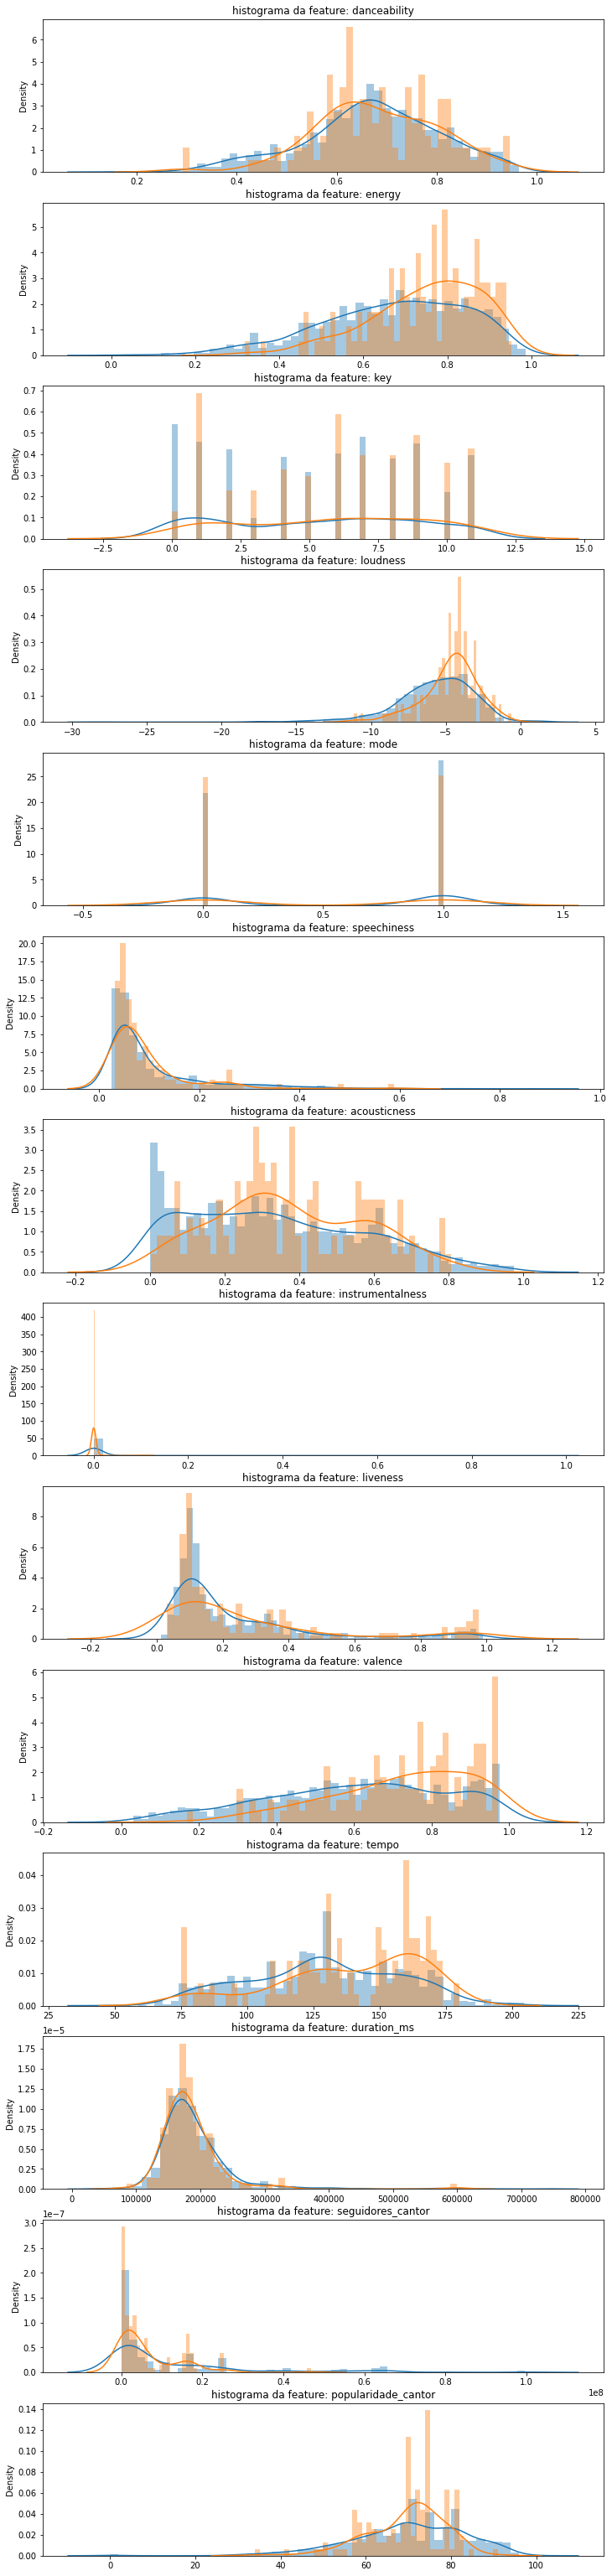

In [28]:
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings("ignore")

features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms','seguidores_cantor','popularidade_cantor']

plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)

for i, cn in enumerate(df_analise[features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df_analise[cn][df_analise.classe == 0], bins=50)
    sns.distplot(df_analise[cn][df_analise.classe == 1], bins=50)
    ax.set_xlabel('')
    ax.set_title('histograma da feature: ' + str(cn))
plt.show()

## 3.5 Pairplots

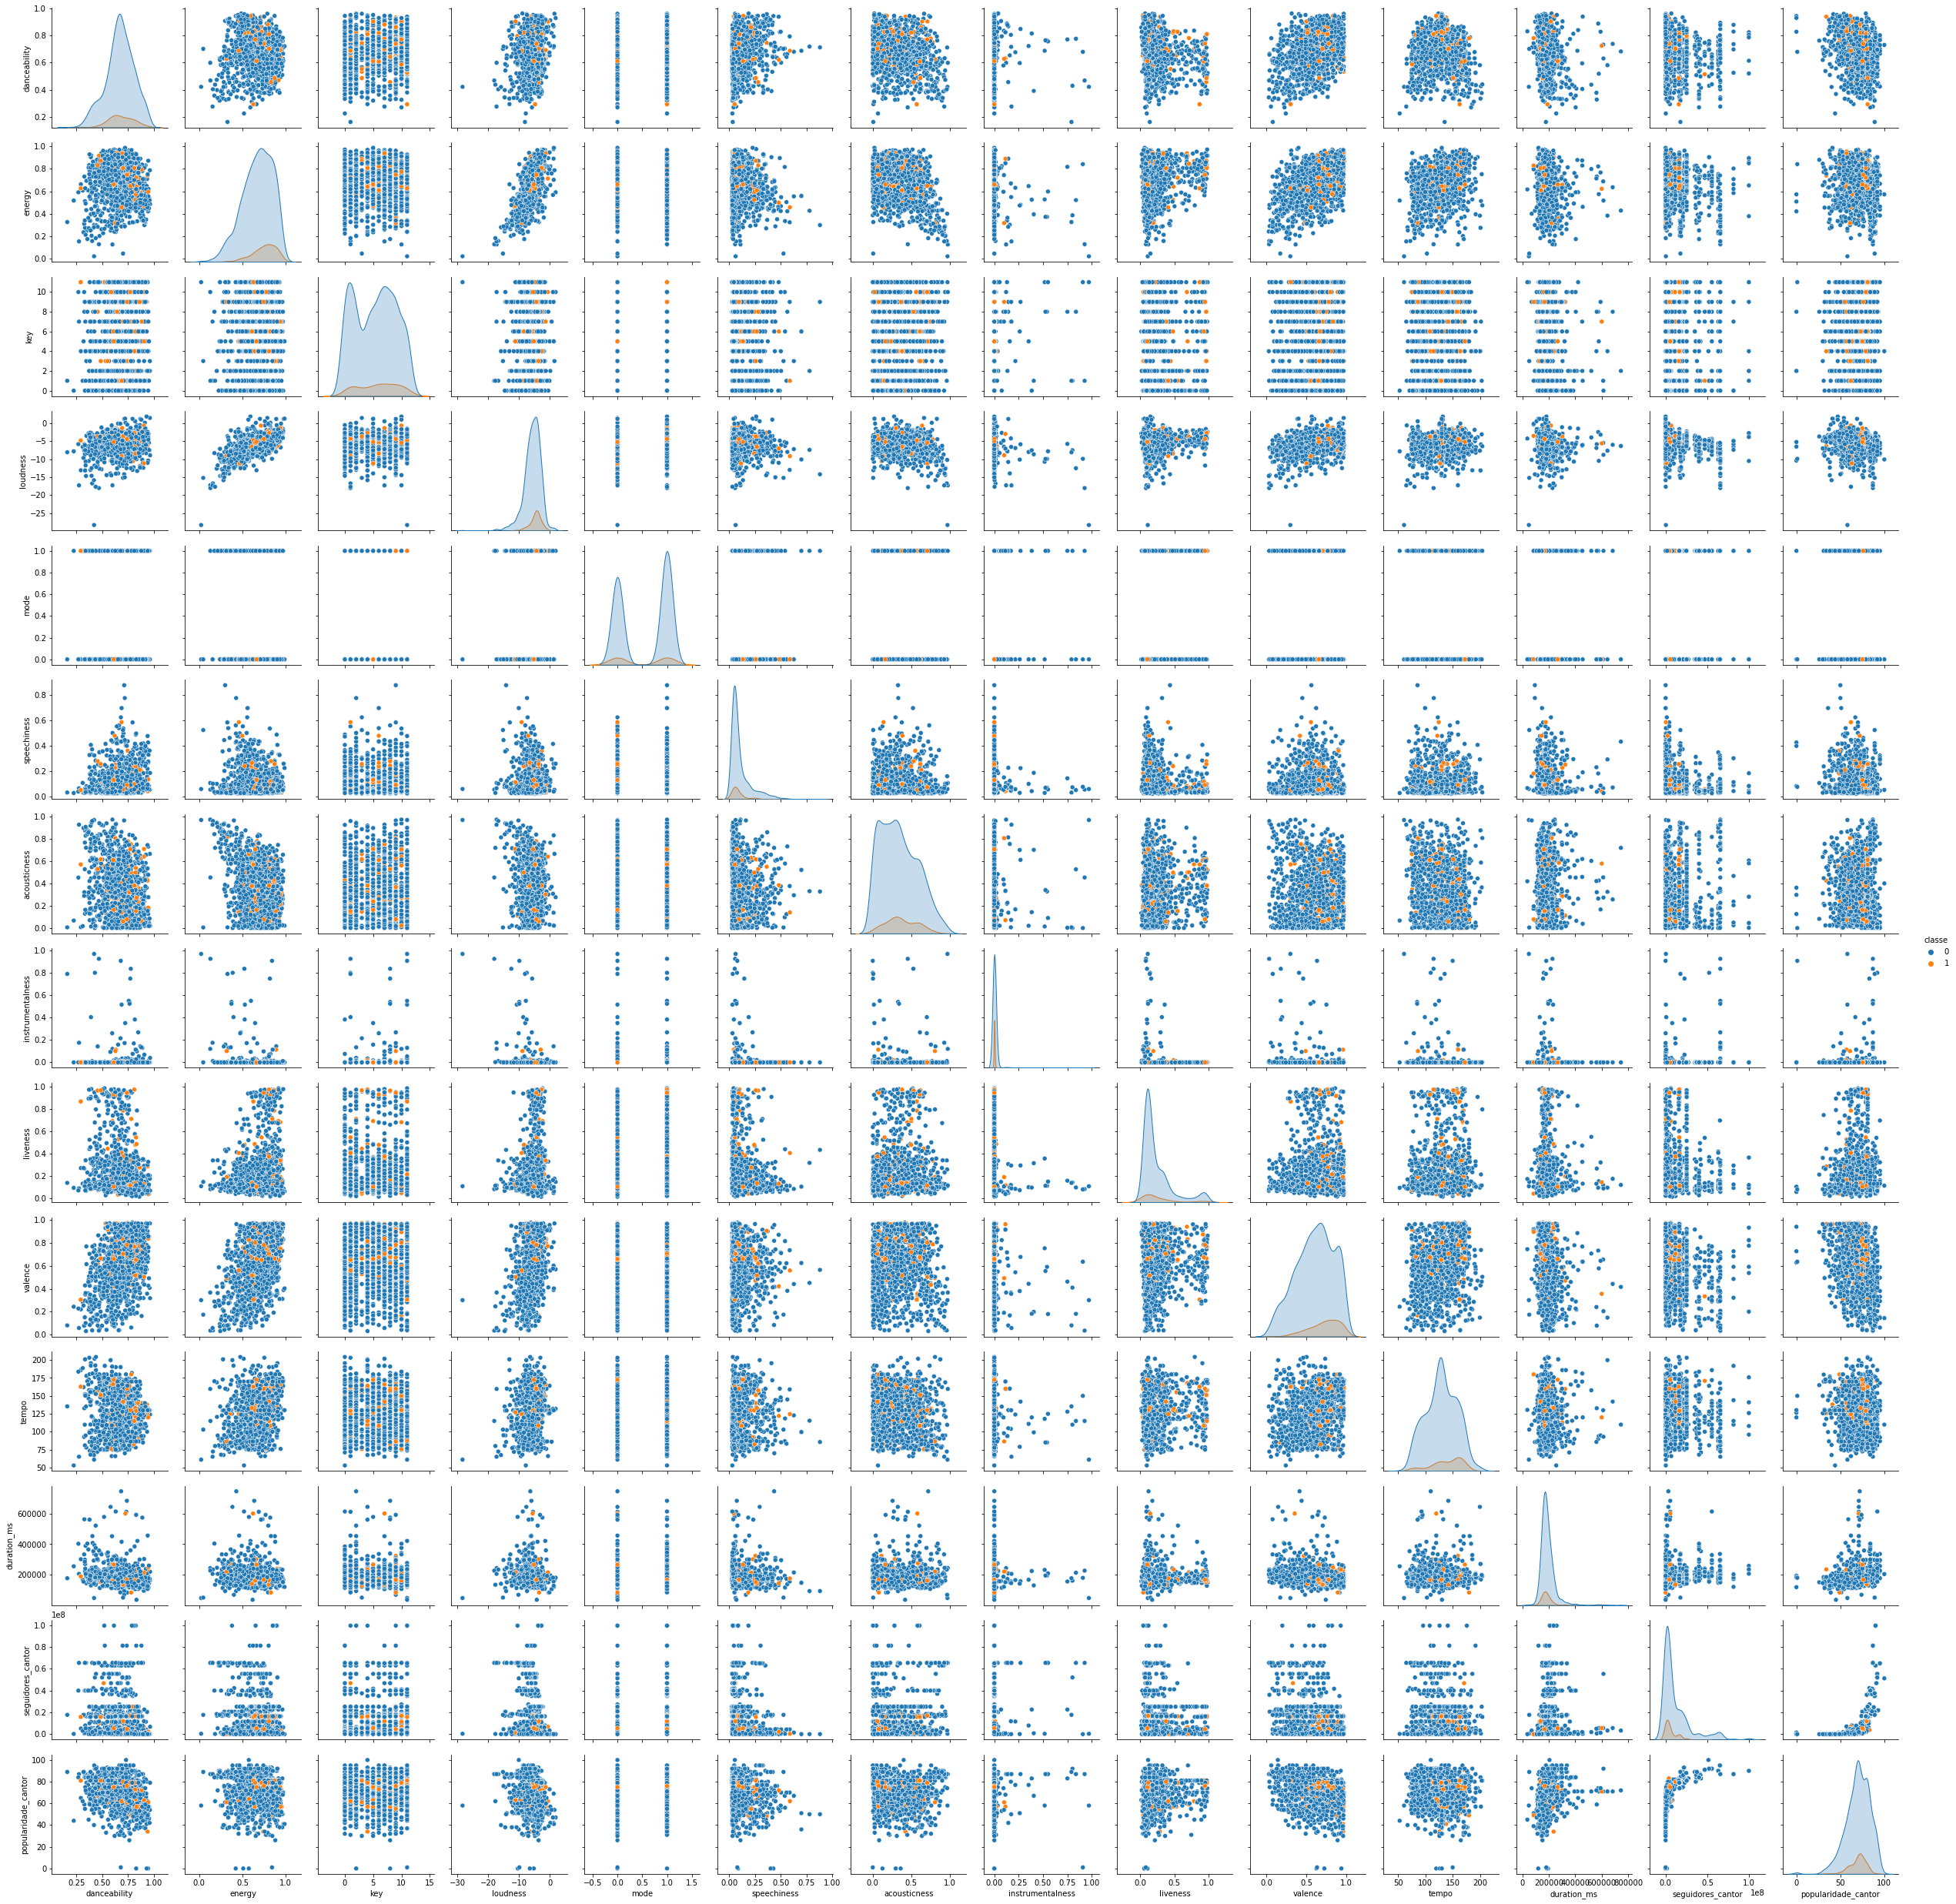

In [96]:
features_comparacoes_1 = ['danceability', 'energy', 'key', 'loudness', 'pop_media_4m', 'classe']
features_comparacoes_2 = ['mode', 'speechiness',  'acousticness', 'instrumentalness', 'liveness', 'pop_media_4m','classe']
features_comparacoes_3 = ['liveness', 'valence', 'tempo', 'duration_ms','pop_media_4m','classe']

features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
            'seguidores_cantor','popularidade_cantor', 'classe']


#sns.pairplot(df_analise[features_comparacoes_1], hue = 'classe' )
sns.pairplot(df_analise[features], hue = 'classe' )
plt.show()

In [29]:
#sns.pairplot(df_analise[features_comparacoes_2], hue = 'classe' )
#plt.show()

In [30]:
#sns.pairplot(df_analise[features_comparacoes_3], hue = 'classe' )
#plt.show()

## 3.6 Estatisticas descritivas de musicas populares e não populares

### 3.6.1 Musicas comuns

In [77]:
df_analise[(df_analise['classe']==0)].describe()

Unnamed: 0  danceability  energy     key  loudness    mode  \
count     1242.00       1242.00 1242.00 1242.00   1242.00 1242.00   
mean       695.55          0.67    0.67    5.30     -5.73    0.56   
std        395.93          0.14    0.17    3.56      2.71    0.50   
min          7.00          0.16    0.02    0.00    -28.32    0.00   
25%        352.50          0.59    0.56    2.00     -7.11    0.00   
50%        689.50          0.67    0.69    6.00     -5.42    1.00   
75%       1040.75          0.76    0.81    8.00     -3.91    1.00   
max       1380.00          0.96    0.99   11.00      1.91    1.00   

       speechiness  acousticness  instrumentalness  liveness  valence   tempo  \
count      1242.00       1242.00           1242.00   1242.00  1242.00 1242.00   
mean          0.11          0.34              0.01      0.24     0.60  129.07   
std           0.11          0.24              0.08      0.23     0.23   28.57   
min           0.02          0.00              0.00      0.01     0.03   52.99   
25%           0.04          0.14              0.00      0.10     0.44  109.46   
50%           0.06          0.31              0.00      0.13     0.63  129.95   
75%           0.13          0.52              0.00      0.31     0.79  150.15   
max           0.88          0.97              0.97      0.99     0.97  204.32   

       duration_ms  time_signature  popularidade_cantor  seguidores_cantor  \
count      1242.00         1242.00              1242.00            1242.00   
mean     190380.48            3.98                69.89        12011814.02   
std       61192.48            0.29                13.64        18210650.95   
min       37801.00            1.00                 0.00             115.00   
25%      158480.00            4.00                62.00          670531.50   
50%      178195.00            4.00                70.00         3491242.00   
75%      207423.50            4.00                80.75        16702383.00   
max      744727.00            5.00               100.00        99612041.00   

       n_registros  pop_media_4m  pop_desvpad_4m  
count      1242.00       1242.00         1019.00  
mean         37.52          0.05            0.03  
std          41.81          0.06            0.03  
min           1.00          0.00            0.00  
25%           3.00          0.00            0.01  
50%          16.00          0.02            0.02  
75%          69.00          0.08            0.05  
max         121.00          0.26            0.27

### 3.6.1 Musicas populares

In [78]:
df_analise[(df_analise['classe']==1)].describe()

Unnamed: 0  danceability  energy    key  loudness   mode  speechiness  \
count      139.00        139.00  139.00 139.00    139.00 139.00       139.00   
mean       640.40          0.68    0.75   5.88     -4.66   0.50         0.09   
std        421.92          0.12    0.13   3.39      1.82   0.50         0.08   
min          0.00          0.29    0.32   0.00    -11.14   0.00         0.03   
25%        313.00          0.60    0.67   3.00     -5.46   0.00         0.04   
50%        710.00          0.67    0.77   6.00     -4.39   1.00         0.06   
75%        983.50          0.77    0.86   9.00     -3.64   1.00         0.10   
max       1377.00          0.95    0.95  11.00     -0.62   1.00         0.59   

       acousticness  instrumentalness  liveness  valence  tempo  duration_ms  \
count        139.00            139.00    139.00   139.00 139.00       139.00   
mean           0.37              0.00      0.27     0.73 138.61    183887.96   
std            0.20              0.01      0.27     0.18  27.73     49986.54   
min            0.00              0.00      0.03     0.17  75.19     85333.00   
25%            0.24              0.00      0.09     0.60 121.98    159812.00   
50%            0.34              0.00      0.14     0.77 147.96    173913.00   
75%            0.55              0.00      0.34     0.88 161.42    196290.50   
max            0.81              0.11      0.98     0.97 179.97    600000.00   

       time_signature  popularidade_cantor  seguidores_cantor  n_registros  \
count          139.00               139.00             139.00       139.00   
mean             4.02                69.60         6131718.65       117.04   
std              0.19                 9.14         7556111.76        11.78   
min              3.00                34.00           17837.00        42.00   
25%              4.00                64.00          679492.00       121.00   
50%              4.00                71.00         3284069.00       121.00   
75%              4.00                75.00         8877936.50       121.00   
max              5.00                91.00        46802573.00       121.00   

       pop_media_4m  pop_desvpad_4m  
count        139.00          139.00  
mean           0.44            0.15  
std            0.15            0.06  
min            0.26            0.03  
25%            0.31            0.10  
50%            0.40            0.14  
75%            0.53            0.19  
max            0.82            0.33

# 4. Limpeza e Feature Engineering

In [79]:
df_analise.columns

Index(['Unnamed: 0', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature', 'URL', 'popularidade_cantor',
       'seguidores_cantor', 'genero_cantor', 'genero_primario_cantor',
       'data_entrada_charts', 'data_final_4m', 'n_registros', 'pop_media_4m',
       'pop_desvpad_4m', 'classe'],
      dtype='object')

In [80]:
df_final = df_analise.copy()
df_final = df_final[['URL','danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness','valence', 'tempo', 'popularidade_cantor', 'seguidores_cantor','genero_primario_cantor','classe']]

## Tipo de dados

In [81]:
df_final.dtypes

URL                        object
danceability              float64
energy                    float64
key                         int64
loudness                  float64
speechiness               float64
acousticness              float64
instrumentalness          float64
liveness                  float64
valence                   float64
tempo                     float64
popularidade_cantor         int64
seguidores_cantor           int64
genero_primario_cantor     object
classe                     object
dtype: object

In [82]:
df_final['classe'] = df_final['classe'].astype(int)
df_final.dtypes

URL                        object
danceability              float64
energy                    float64
key                         int64
loudness                  float64
speechiness               float64
acousticness              float64
instrumentalness          float64
liveness                  float64
valence                   float64
tempo                     float64
popularidade_cantor         int64
seguidores_cantor           int64
genero_primario_cantor     object
classe                      int32
dtype: object

In [83]:
df_final.nunique()

URL                       1381
danceability               495
energy                     571
key                         12
loudness                  1167
speechiness                708
acousticness               768
instrumentalness           384
liveness                   638
valence                    646
tempo                     1219
popularidade_cantor         68
seguidores_cantor          389
genero_primario_cantor      92
classe                       2
dtype: int64

In [84]:
numeric_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness','valence', 'tempo', 'popularidade_cantor', 'seguidores_cantor']
categorical_features = ['genero_primario_cantor','key']
chave_primaria = ['URL']
target = ['classe']

## 4.1 Variáveis categóricas

In [85]:
df_final.key.unique()

array([10,  5,  9, 11,  6,  3,  1,  7,  4,  0,  2,  8], dtype=int64)

In [86]:
df_final.key.value_counts()

0     152
1     146
7     143
9     138
6     128
2     122
11    121
4     116
8     115
5      95
10     71
3      34
Name: key, dtype: int64

In [87]:
df_final.genero_primario_cantor.unique()

array(['arrocha', nan, 'funk carioca', 'forro', 'sertanejo pop', 'pagode',
       'sertanejo', 'arrochadeira', 'brazilian hip hop',
       'canadian contemporary r&b', 'funk 150 bpm', 'brega funk', 'pop',
       'electro house', 'dance pop', 'melodic rap', 'australian pop',
       'indie soul', 'axe', 'r&b brasileiro', 'funk bh', 'rap baiano',
       'edm', 'brazilian rock', 'cali rap', 'pop nacional', 'mpb',
       'canadian pop', 'k-pop', 'rap', 'belo horizonte indie', 'art pop',
       'folk brasileiro', 'slap house', 'north carolina hip hop',
       'adoracao', 'afrofuturismo brasileiro', 'modern alternative rock',
       'indie curitibano', 'modern rock', 'latin', 'big room', 'alt z',
       'trap baiano', 'brazilian edm', 'trap brasileiro',
       'pop rap brasileiro', 'hip hop', 'bossa nova',
       'australian hip hop', 'funk mtg', 'colombian pop', 'pagode novo',
       'dutch pop', 'canadian hip hop', 'funk mandelao', 'trap funk',
       'nerdcore brasileiro', 'lgbtq+ hip hop'

In [88]:
df_final.genero_primario_cantor.value_counts()

arrocha             486
funk carioca        177
dance pop            66
pop                  48
art pop              43
                   ... 
indie curitibano      1
manguebeat            1
dutch pop             1
funk capixaba         1
brazilian gospel      1
Name: genero_primario_cantor, Length: 92, dtype: int64

## 4.2 Variáveis numéricas

## 4.3 Dados duplicados

In [89]:
df_final.duplicated().sum()

0

Não há dados duplicados na base

## 4.4 Dados Faltantes

In [90]:
df_final.isnull().sum()

URL                        0
danceability               0
energy                     0
key                        0
loudness                   0
speechiness                0
acousticness               0
instrumentalness           0
liveness                   0
valence                    0
tempo                      0
popularidade_cantor        0
seguidores_cantor          0
genero_primario_cantor    49
classe                     0
dtype: int64

49 registros sem nenhum genero atribuido ao cantor, pode ter ocorrido um problema na captura de dados do spotify

In [91]:
df_final = df_final.dropna()
df_final.isnull().sum()

URL                       0
danceability              0
energy                    0
key                       0
loudness                  0
speechiness               0
acousticness              0
instrumentalness          0
liveness                  0
valence                   0
tempo                     0
popularidade_cantor       0
seguidores_cantor         0
genero_primario_cantor    0
classe                    0
dtype: int64

In [92]:
df_final

URL  danceability  energy  \
0     https://open.spotify.com/track/2JTir3y1VuJQmex...          0.58    0.94   
1     https://open.spotify.com/track/3rRin3LyLY92kpE...          0.60    0.91   
3     https://open.spotify.com/track/6sPBi0qLI6KM3yX...          0.71    0.82   
4     https://open.spotify.com/track/15k1TDabqSEmyXO...          0.63    0.95   
5     https://open.spotify.com/track/3dPvQLKl42dMYWV...          0.78    0.89   
...                                                 ...           ...     ...   
1376  https://open.spotify.com/track/7MJiZazhXeWZoFZ...          0.83    0.62   
1377  https://open.spotify.com/track/2AQJRDfQJbfgmTf...          0.61    0.66   
1378  https://open.spotify.com/track/67MzL6NnggPqvBf...          0.81    0.70   
1379  https://open.spotify.com/track/7uHVSsfgVm7FpG7...          0.94    0.75   
1380  https://open.spotify.com/track/1TFqH3zKOiTZoVe...          0.41    0.83   

      key  loudness  speechiness  acousticness  instrumentalness  liveness  \
0      10     -2.12         0.09          0.45              0.00      0.68   
1       5     -2.42         0.06          0.50              0.00      0.69   
3      11     -4.79         0.03          0.69              0.00      0.15   
4       9     -1.28         0.03          0.32              0.00      0.12   
5       6     -6.68         0.05          0.59              0.00      0.10   
...   ...       ...          ...           ...               ...       ...   
1376    1     -0.86         0.20          0.19              0.03      0.12   
1377    5     -5.17         0.13          0.16              0.00      0.10   
1378    7     -7.15         0.06          0.07              0.00      0.07   
1379    2     -2.80         0.10          0.15              0.00      0.07   
1380    2     -6.06         0.06          0.62              0.00      0.33   

      valence  tempo  popularidade_cantor  seguidores_cantor  \
0        0.94 168.10                   70            6220557   
1        0.83 168.01                   70            6220557   
3        0.92 150.06                   70            2665488   
4        0.80 160.06                   57            1629840   
5        0.94 172.01                   70            6220557   
...       ...    ...                  ...                ...   
1376     0.91  86.49                   51               6640   
1377     0.66 172.47                   75            5429554   
1378     0.94 159.97                   66              89158   
1379     0.96 130.05                   49              91351   
1380     0.77 181.22                   71            1894024   

     genero_primario_cantor  classe  
0                   arrocha       1  
1                   arrocha       1  
3                   arrocha       1  
4                   arrocha       1  
5                   arrocha       1  
...                     ...     ...  
1376               funk mtg       0  
1377         r&b brasileiro       1  
1378              rave funk       0  
1379                arrocha       0  
1380                 pagode       0  

[1332 rows x 15 columns]

## Performance musicas populares vs comuns

In [93]:
df_plot = df.copy()
df_plot = df_plot.merge(df_final, how='left', on='URL')
df_plot.dropna(inplace=True)
print(len(df_plot.URL.unique())), print(len(df_final.URL.unique()))
#df_plot

1332
1332


(None, None)

In [94]:
## Normalizando numero de streams com standardScaler
df_plot3 = df_plot.copy()
scaler = StandardScaler()
scaler.fit(df_plot3['stream_diaria'].to_numpy().reshape(-1, 1))
X = scaler.transform(df_plot3['stream_diaria'].to_numpy().reshape(-1, 1))

df_plot3['stream_diaria'] = X
df_plot3.set_index(keys = 'data', inplace=True)
#df_plot3

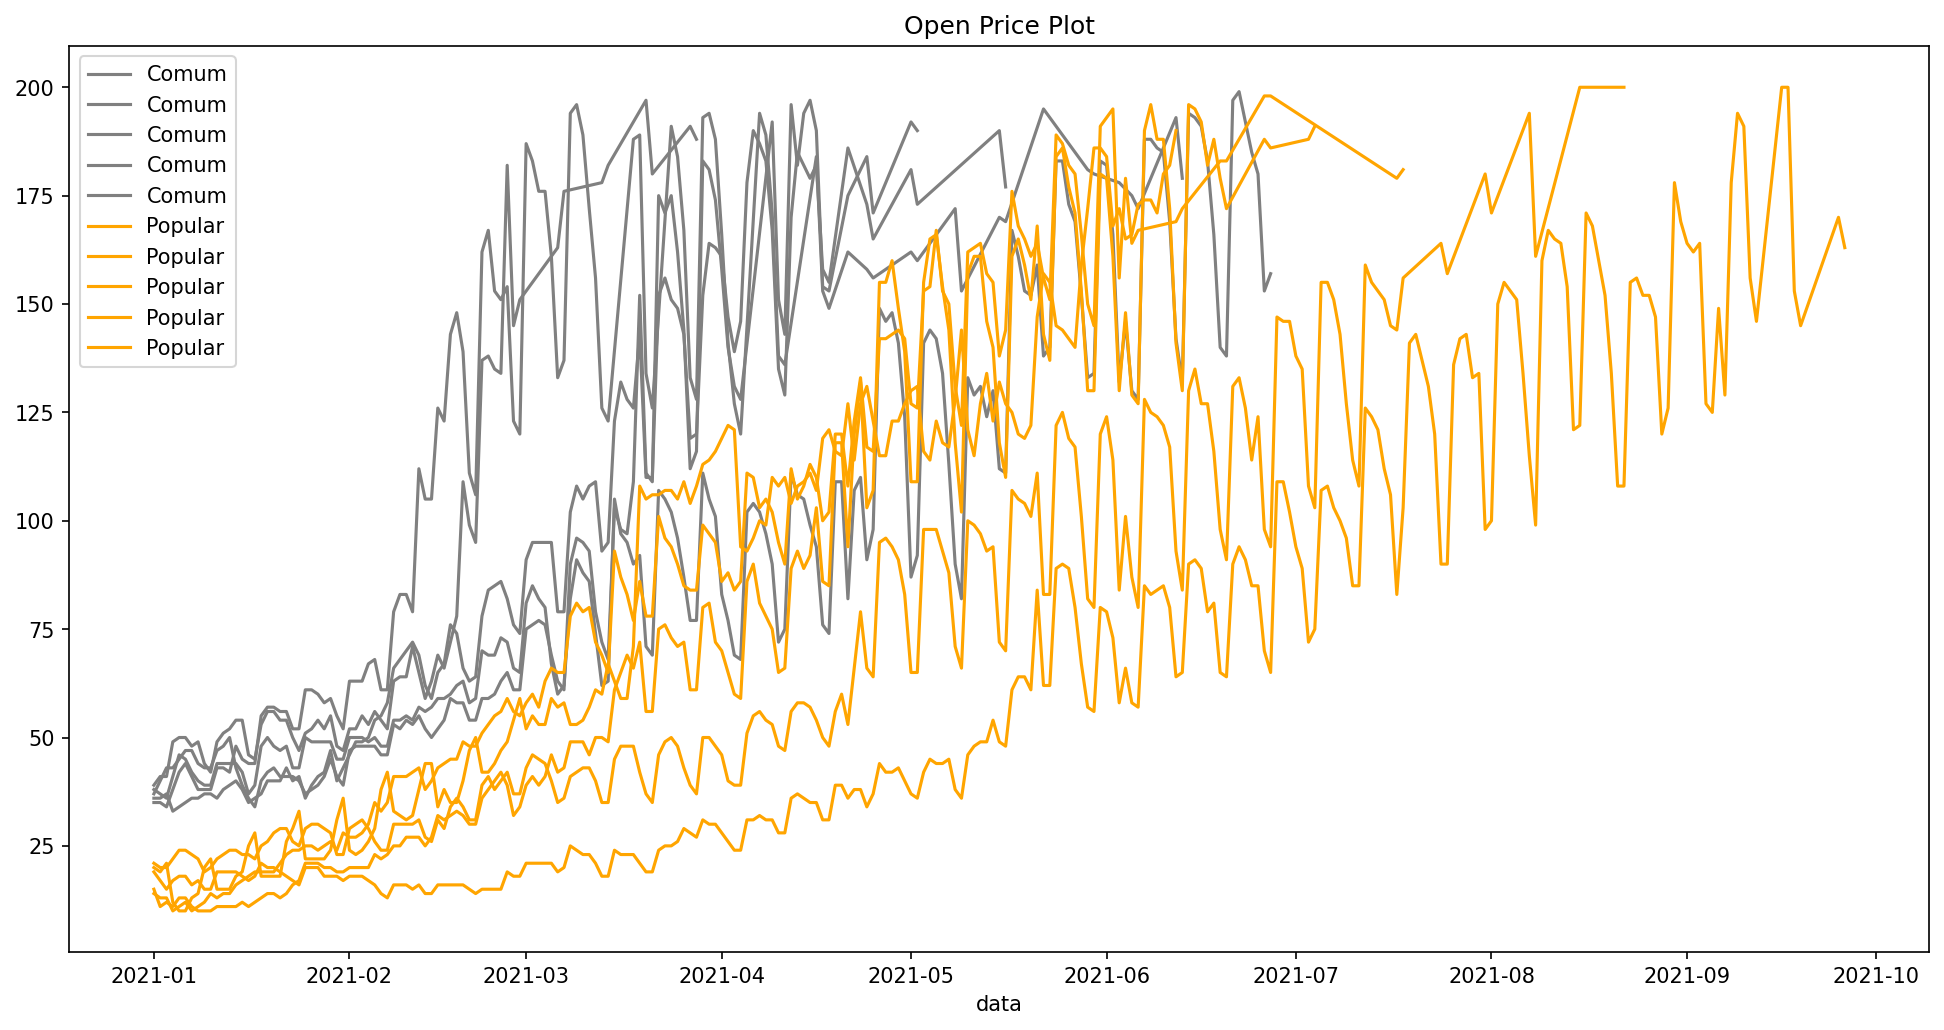

In [95]:
import random

#num_aleatorio = random.randint(1,125)
num_aleatorio=11

num_lines_each_class = 5

# code
# Visualizing The Open Price of all the stocks

# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)
  
# using plot method to plot open prices.
# in plot method we set the label and color of the curve.

for key, grp in df_plot3.groupby(['classe']): 
    
    if key == 1:
        label = "Popular"
        color = 'orange'

        
    else:
        label = "Comum"
        color = 'gray'

        
    for i, URL in enumerate(df_final[(df_final['classe']==key)].URL.unique()):
        
        if i in range(num_aleatorio,num_lines_each_class+num_aleatorio):
            grp_filtrado_URL = grp[(grp['URL']==URL)]        
            grp_filtrado_URL['Position'].plot(label=label, color=color)
        

  
###adding title to the plot
plt.title('Open Price Plot')
  
# adding Label to the x-axis
plt.xlabel('data')
  
# adding legend to the curve
plt.legend()

# 5 Amostragem de 20% dos dados para validação, 20% teste, 60% treino

In [96]:
from sklearn.model_selection import train_test_split

X = df_final.drop(["URL","classe"],axis=1)
y = df_final["classe"]

X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size=0.20,random_state = 0, stratify = y)

## teste é 25% do conjunto de treino e corresponde á 20% da base total de dados
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train,test_size=0.25,random_state = 0, stratify = y_train)

y_valid.value_counts()

0    240
1     27
Name: classe, dtype: int64

In [97]:
y_train.value_counts()

0    718
1     80
Name: classe, dtype: int64

In [98]:
y_test.value_counts()

0    240
1     27
Name: classe, dtype: int64

# 6 Pré-Processamento

## 6.1 LabelEncoding

In [99]:
features_encoder = ['genero_primario_cantor']

In [100]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

X_train_labelencoder = X_train.copy()

for feature in features_encoder:
    
    X = enc.fit_transform(X_train[feature])
    
    #Atualizando o dataframe
    X_train_labelencoder[feature] = X
    
X_train_labelencoder.head()

danceability  energy  key  loudness  speechiness  acousticness  \
19            0.87    0.67    0     -3.84         0.04          0.23   
763           0.73    0.64   11     -8.69         0.07          0.48   
1080          0.58    0.67    4     -4.75         0.03          0.28   
191           0.65    0.87    3     -3.06         0.04          0.35   
790           0.65    0.79    6     -3.83         0.04          0.61   

      instrumentalness  liveness  valence  tempo  popularidade_cantor  \
19                0.00      0.09     0.89 135.06                   72   
763               0.04      0.08     0.91 152.06                   75   
1080              0.00      0.17     0.53 110.00                   74   
191               0.00      0.14     0.93 155.97                   70   
790               0.00      0.92     0.87 154.03                   69   

      seguidores_cantor  genero_primario_cantor  
19              5004855                      38  
763             3491242                       5  
1080           16702383                       5  
191             3966357                       5  
790              438089                       5

In [101]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

X_valid_labelencoder = X_valid.copy()

for feature in features_encoder:
    
    X = enc.fit_transform(X_valid[feature])
    
    #Atualizando o dataframe
    X_valid_labelencoder[feature] = X
    
X_valid_labelencoder.head()

danceability  energy  key  loudness  speechiness  acousticness  \
773          0.72    0.79    0     -4.40         0.04          0.35   
53           0.75    0.74    7     -4.79         0.03          0.51   
710          0.63    0.86   11     -1.89         0.04          0.43   
740          0.82    0.73    6     -5.05         0.09          0.45   
827          0.68    0.58    9     -6.41         0.17          0.47   

     instrumentalness  liveness  valence  tempo  popularidade_cantor  \
773              0.00      0.56     0.77 120.11                   70   
53               0.00      0.10     0.61 122.04                   53   
710              0.00      0.21     0.82 149.95                   75   
740              0.00      0.13     0.69 145.12                   45   
827              0.00      0.22     0.40  90.02                   74   

     seguidores_cantor  genero_primario_cantor  
773            4538394                      42  
53              184886                      21  
710             524751                       3  
740             120230                      25  
827            3284069                      25

In [102]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

X_test_labelencoder = X_test.copy()

for feature in features_encoder:
    
    X = enc.fit_transform(X_test[feature])
    
    #Atualizando o dataframe
    X_test_labelencoder[feature] = X
    
X_test_labelencoder.head()

danceability  energy  key  loudness  speechiness  acousticness  \
94            0.79    0.79   11     -4.52         0.08          0.01   
766           0.68    0.85    1     -5.45         0.03          0.72   
669           0.80    0.54    4     -8.46         0.28          0.23   
1237          0.77    0.73    9     -4.23         0.03          0.11   
471           0.69    0.90    8     -3.94         0.05          0.01   

      instrumentalness  liveness  valence  tempo  popularidade_cantor  \
94                0.00      0.10     0.68 123.95                   89   
766               0.00      0.33     0.94 150.00                   75   
669               0.00      0.25     0.42 125.13                   70   
1237              0.00      0.24     0.73 135.00                   79   
471               0.00      0.18     0.78  92.04                   77   

      seguidores_cantor  genero_primario_cantor  
94             34967092                      19  
766             3491242                       4  
669             4326456                      24  
1237           16376285                       4  
471            11583399                      21

# 6.2 OneHot Encoding

In [103]:
from category_encoders.one_hot import OneHotEncoder

enc = OneHotEncoder(cols=features_encoder, use_cat_names=True)
enc.fit(X_train)

OneHotEncoder(cols=['genero_primario_cantor'], use_cat_names=True)

In [104]:
X_train_ohe = enc.transform(X_train)
X_train_ohe

danceability  energy  key  loudness  speechiness  acousticness  \
19            0.87    0.67    0     -3.84         0.04          0.23   
763           0.73    0.64   11     -8.69         0.07          0.48   
1080          0.58    0.67    4     -4.75         0.03          0.28   
191           0.65    0.87    3     -3.06         0.04          0.35   
790           0.65    0.79    6     -3.83         0.04          0.61   
...            ...     ...  ...       ...          ...           ...   
1242          0.58    0.56    6     -6.37         0.03          0.01   
987           0.62    0.94    5     -2.17         0.04          0.36   
1070          0.68    0.56    6     -6.49         0.08          0.53   
953           0.75    0.69    7     -3.95         0.06          0.27   
35            0.92    0.83    5     -1.36         0.14          0.58   

      instrumentalness  liveness  valence  tempo  ...  \
19                0.00      0.09     0.89 135.06  ...   
763               0.04      0.08     0.91 152.06  ...   
1080              0.00      0.17     0.53 110.00  ...   
191               0.00      0.14     0.93 155.97  ...   
790               0.00      0.92     0.87 154.03  ...   
...                ...       ...      ...    ...  ...   
1242              0.00      0.06     0.77 154.01  ...   
987               0.00      0.07     0.97 167.94  ...   
1070              0.00      0.10     0.67 135.97  ...   
953               0.00      0.30     0.40 148.07  ...   
35                0.00      0.05     0.60 133.09  ...   

      genero_primario_cantor_permanent wave  \
19                                        0   
763                                       0   
1080                                      0   
191                                       0   
790                                       0   
...                                     ...   
1242                                      0   
987                                       0   
1070                                      0   
953                                       0   
35                                        0   

      genero_primario_cantor_rap baiano  genero_primario_cantor_dfw rap  \
19                                    0                               0   
763                                   0                               0   
1080                                  0                               0   
191                                   0                               0   
790                                   0                               0   
...                                 ...                             ...   
1242                                  0                               0   
987                                   0                               0   
1070                                  0                               0   
953                                   0                               0   
35                                    0                               0   

      genero_primario_cantor_irish singer-songwriter  \
19                                                 0   
763                                                0   
1080                                               0   
191                                                0   
790                                                0   
...                                              ...   
1242                                               0   
987                                                0   
1070                                               0   
953                                                0   
35                                                 0   

      genero_primario_cantor_latin arena pop  \
19                                         0   
763                                        0   
1080                                       0   
191                                        0   
790                                        0   
...                          

In [105]:
X_valid_ohe = enc.transform(X_valid)
X_valid_ohe

danceability  energy  key  loudness  speechiness  acousticness  \
773           0.72    0.79    0     -4.40         0.04          0.35   
53            0.75    0.74    7     -4.79         0.03          0.51   
710           0.63    0.86   11     -1.89         0.04          0.43   
740           0.82    0.73    6     -5.05         0.09          0.45   
827           0.68    0.58    9     -6.41         0.17          0.47   
...            ...     ...  ...       ...          ...           ...   
1007          0.84    0.53    6     -8.12         0.15          0.04   
731           0.76    0.58    4     -6.97         0.05          0.43   
1220          0.75    0.91   10     -3.90         0.06          0.22   
70            0.95    0.54    5     -5.41         0.08          0.05   
120           0.78    0.90    6     -3.06         0.04          0.38   

      instrumentalness  liveness  valence  tempo  ...  \
773               0.00      0.56     0.77 120.11  ...   
53                0.00      0.10     0.61 122.04  ...   
710               0.00      0.21     0.82 149.95  ...   
740               0.00      0.13     0.69 145.12  ...   
827               0.00      0.22     0.40  90.02  ...   
...                ...       ...      ...    ...  ...   
1007              0.00      0.12     0.58 163.97  ...   
731               0.00      0.08     0.88 155.93  ...   
1220              0.00      0.52     0.82 101.87  ...   
70                0.02      0.04     0.85 129.99  ...   
120               0.00      0.06     0.90 144.12  ...   

      genero_primario_cantor_permanent wave  \
773                                       0   
53                                        0   
710                                       0   
740                                       0   
827                                       0   
...                                     ...   
1007                                      0   
731                                       0   
1220                                      0   
70                                        0   
120                                       0   

      genero_primario_cantor_rap baiano  genero_primario_cantor_dfw rap  \
773                                   0                               0   
53                                    0                               0   
710                                   0                               0   
740                                   0                               0   
827                                   0                               0   
...                                 ...                             ...   
1007                                  0                               0   
731                                   0                               0   
1220                                  0                               0   
70                                    0                               0   
120                                   0                               0   

      genero_primario_cantor_irish singer-songwriter  \
773                                                0   
53                                                 0   
710                                                0   
740                                                0   
827                                                0   
...                                              ...   
1007                                               0   
731                                                0   
1220                                               0   
70                                                 0   
120                                                0   

      genero_primario_cantor_latin arena pop  \
773                                        0   
53                                         0   
710                                        0   
740                                        0   
827                                        0   
...                          

In [106]:
X_test_ohe = enc.transform(X_test)
X_test_ohe

danceability  energy  key  loudness  speechiness  acousticness  \
94            0.79    0.79   11     -4.52         0.08          0.01   
766           0.68    0.85    1     -5.45         0.03          0.72   
669           0.80    0.54    4     -8.46         0.28          0.23   
1237          0.77    0.73    9     -4.23         0.03          0.11   
471           0.69    0.90    8     -3.94         0.05          0.01   
...            ...     ...  ...       ...          ...           ...   
1307          0.52    0.89    6     -4.23         0.17          0.26   
367           0.87    0.37    9    -11.88         0.24          0.63   
1314          0.43    0.68    4     -6.62         0.18          0.02   
247           0.60    0.53    6     -7.71         0.43          0.02   
1029          0.95    0.45    1     -7.41         0.06          0.02   

      instrumentalness  liveness  valence  tempo  ...  \
94                0.00      0.10     0.68 123.95  ...   
766               0.00      0.33     0.94 150.00  ...   
669               0.00      0.25     0.42 125.13  ...   
1237              0.00      0.24     0.73 135.00  ...   
471               0.00      0.18     0.78  92.04  ...   
...                ...       ...      ...    ...  ...   
1307              0.00      0.33     0.54 192.00  ...   
367               0.00      0.16     0.68 130.03  ...   
1314              0.00      0.10     0.40 192.51  ...   
247               0.00      0.10     0.08 120.11  ...   
1029              0.00      0.12     0.49 130.04  ...   

      genero_primario_cantor_permanent wave  \
94                                        0   
766                                       0   
669                                       0   
1237                                      0   
471                                       0   
...                                     ...   
1307                                      0   
367                                       0   
1314                                      0   
247                                       0   
1029                                      0   

      genero_primario_cantor_rap baiano  genero_primario_cantor_dfw rap  \
94                                    0                               0   
766                                   0                               0   
669                                   0                               0   
1237                                  0                               0   
471                                   0                               0   
...                                 ...                             ...   
1307                                  0                               0   
367                                   0                               0   
1314                                  0                               0   
247                                   0                               0   
1029                                  0                               0   

      genero_primario_cantor_irish singer-songwriter  \
94                                                 0   
766                                                0   
669                                                0   
1237                                               0   
471                                                0   
...                                              ...   
1307                                               0   
367                                                0   
1314                                               0   
247                                                0   
1029                                               0   

      genero_primario_cantor_latin arena pop  \
94                                         0   
766                                        0   
669                                        0   
1237                                       0   
471                                        0   
...                          

# Target Encoding

In [107]:
from category_encoders.target_encoder import TargetEncoder
enc = TargetEncoder(cols=features_encoder,
                   min_samples_leaf=200)
enc.fit(X_train, y_train)
X_train_targetencoding = enc.transform(X_train)
X_train_targetencoding   

danceability  energy  key  loudness  speechiness  acousticness  \
19            0.87    0.67    0     -3.84         0.04          0.23   
763           0.73    0.64   11     -8.69         0.07          0.48   
1080          0.58    0.67    4     -4.75         0.03          0.28   
191           0.65    0.87    3     -3.06         0.04          0.35   
790           0.65    0.79    6     -3.83         0.04          0.61   
...            ...     ...  ...       ...          ...           ...   
1242          0.58    0.56    6     -6.37         0.03          0.01   
987           0.62    0.94    5     -2.17         0.04          0.36   
1070          0.68    0.56    6     -6.49         0.08          0.53   
953           0.75    0.69    7     -3.95         0.06          0.27   
35            0.92    0.83    5     -1.36         0.14          0.58   

      instrumentalness  liveness  valence  tempo  popularidade_cantor  \
19                0.00      0.09     0.89 135.06                   72   
763               0.04      0.08     0.91 152.06                   75   
1080              0.00      0.17     0.53 110.00                   74   
191               0.00      0.14     0.93 155.97                   70   
790               0.00      0.92     0.87 154.03                   69   
...                ...       ...      ...    ...                  ...   
1242              0.00      0.06     0.77 154.01                   92   
987               0.00      0.07     0.97 167.94                   70   
1070              0.00      0.10     0.67 135.97                   63   
953               0.00      0.30     0.40 148.07                   89   
35                0.00      0.05     0.60 133.09                   53   

      seguidores_cantor  genero_primario_cantor  
19              5004855                    0.10  
763             3491242                    0.18  
1080           16702383                    0.18  
191             3966357                    0.18  
790              438089                    0.18  
...                 ...                     ...  
1242           55342492                    0.10  
987             6220557                    0.18  
1070            1068074                    0.10  
953            17698450                    0.10  
35                79052                    0.10  

[798 rows x 13 columns]

In [108]:
X_valid_targetencoding = enc.transform(X_valid)
X_valid_targetencoding   

danceability  energy  key  loudness  speechiness  acousticness  \
773           0.72    0.79    0     -4.40         0.04          0.35   
53            0.75    0.74    7     -4.79         0.03          0.51   
710           0.63    0.86   11     -1.89         0.04          0.43   
740           0.82    0.73    6     -5.05         0.09          0.45   
827           0.68    0.58    9     -6.41         0.17          0.47   
...            ...     ...  ...       ...          ...           ...   
1007          0.84    0.53    6     -8.12         0.15          0.04   
731           0.76    0.58    4     -6.97         0.05          0.43   
1220          0.75    0.91   10     -3.90         0.06          0.22   
70            0.95    0.54    5     -5.41         0.08          0.05   
120           0.78    0.90    6     -3.06         0.04          0.38   

      instrumentalness  liveness  valence  tempo  popularidade_cantor  \
773               0.00      0.56     0.77 120.11                   70   
53                0.00      0.10     0.61 122.04                   53   
710               0.00      0.21     0.82 149.95                   75   
740               0.00      0.13     0.69 145.12                   45   
827               0.00      0.22     0.40  90.02                   74   
...                ...       ...      ...    ...                  ...   
1007              0.00      0.12     0.58 163.97                   82   
731               0.00      0.08     0.88 155.93                   58   
1220              0.00      0.52     0.82 101.87                   81   
70                0.02      0.04     0.85 129.99                   57   
120               0.00      0.06     0.90 144.12                   44   

      seguidores_cantor  genero_primario_cantor  
773             4538394                    0.10  
53               184886                    0.10  
710              524751                    0.18  
740              120230                    0.10  
827             3284069                    0.10  
...                 ...                     ...  
1007           11385121                    0.10  
731              635797                    0.10  
1220           25185253                    0.18  
70               432676                    0.10  
120               20254                    0.10  

[267 rows x 13 columns]

In [109]:
X_test_targetencoding = enc.transform(X_test)
X_test_targetencoding 

danceability  energy  key  loudness  speechiness  acousticness  \
94            0.79    0.79   11     -4.52         0.08          0.01   
766           0.68    0.85    1     -5.45         0.03          0.72   
669           0.80    0.54    4     -8.46         0.28          0.23   
1237          0.77    0.73    9     -4.23         0.03          0.11   
471           0.69    0.90    8     -3.94         0.05          0.01   
...            ...     ...  ...       ...          ...           ...   
1307          0.52    0.89    6     -4.23         0.17          0.26   
367           0.87    0.37    9    -11.88         0.24          0.63   
1314          0.43    0.68    4     -6.62         0.18          0.02   
247           0.60    0.53    6     -7.71         0.43          0.02   
1029          0.95    0.45    1     -7.41         0.06          0.02   

      instrumentalness  liveness  valence  tempo  popularidade_cantor  \
94                0.00      0.10     0.68 123.95                   89   
766               0.00      0.33     0.94 150.00                   75   
669               0.00      0.25     0.42 125.13                   70   
1237              0.00      0.24     0.73 135.00                   79   
471               0.00      0.18     0.78  92.04                   77   
...                ...       ...      ...    ...                  ...   
1307              0.00      0.33     0.54 192.00                   57   
367               0.00      0.16     0.68 130.03                   51   
1314              0.00      0.10     0.40 192.51                   74   
247               0.00      0.10     0.08 120.11                   63   
1029              0.00      0.12     0.49 130.04                   46   

      seguidores_cantor  genero_primario_cantor  
94             34967092                    0.10  
766             3491242                    0.18  
669             4326456                    0.10  
1237           16376285                    0.18  
471            11583399                    0.10  
...                 ...                     ...  
1307            1015619                    0.10  
367              111577                    0.10  
1314            3284069                    0.10  
247              642031                    0.10  
1029               5165                    0.10  

[267 rows x 13 columns]

# 7 Prototipação - Balanceamento de classes e seleção de modelos

In [77]:
Exemplos_minoritario = y_train.value_counts()[1]/(y_train.value_counts().sum())*100
Exemplos_majoritario = y_train.value_counts()[0]/(y_train.value_counts().sum())*100

fator_balanceamento_inicial = Exemplos_minoritario / (100 - Exemplos_minoritario)
fator_balanceamento_inicial

0.11142061281337047

In [78]:
fator_balanceamento_inicial= 0.12

#### Definindo dicionário com os dados de diferentes tipos de encoding

In [79]:
dicionario_teste = {'labelencode': [X_train_labelencoder, X_valid_labelencoder, X_test_labelencoder], 'ohe': [X_train_ohe, X_valid_ohe, X_test_ohe], 'target': [X_train_targetencoding, X_valid_targetencoding, X_test_targetencoding] }

In [67]:
#Balanceamento de dados
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from lazypredict.Supervised import LazyClassifier
from sklearn.preprocessing import StandardScaler
    
df_models = pd.DataFrame()

fator_balanceamento = np.linspace(fator_balanceamento_inicial,0.99,20).tolist()
#fator_balanceamento = np.linspace(0.38,0.65,20).tolist()

#Loop numero de repetições do experimento
for i in range(1):
    
    #loop fator de Balanceamento
    for fator in fator_balanceamento:
        
        #Acompanhamento do andamento dos experimentos
        print(i+1,fator)
        
        #loop tipo de encoding
        for encode in dicionario_teste.keys():
            
            
            #Definindo os dados de acordo com o encoding
            X_train2 = dicionario_teste[encode][0]
            y_train2 = y_train
            
            X_valid2 = dicionario_teste[encode][1]


            ###################################################### UNDERSAMPLING ###############################################
            
            #Aplicando balanceamento    
            nr = NearMiss(sampling_strategy = fator)
            X_train3, y_train3 = nr.fit_resample(X_train2, y_train2)

            #Definindo dados de treino (aprendendo com 80% da amostra de treino)
            X_train4, X_descarte, y_train4, y_descarte = train_test_split(X_train3, y_train3,test_size=0.2,random_state = i, stratify = y_train3)

            # Normalizando
            scaler = StandardScaler()
            scaler.fit(X_train4)

            X_train_norm = scaler.transform(X_train4)
            X_valid_norm = scaler.transform(X_valid2)
            
            #Treinando e avaliando dados nao normalizados
            clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
            models,predictions = clf.fit(X_train4, X_valid2, y_train4, y_valid)
            models['fator'] = fator
            models['metodo'] = 'UnderSampling'
            models['encode'] = encode
            models['Normalizacao'] = "NAO"
            df_models = df_models.append(models.reset_index(), ignore_index=True)

            #Treinando e avaliando dados normalizados
            clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
            models,predictions = clf.fit(X_train_norm, X_valid_norm, y_train4, y_valid)
            models['fator'] = fator
            models['metodo'] = 'UnderSampling'
            models['encode'] = encode
            models['Normalizacao'] = "SIM"
            df_models = df_models.append(models.reset_index(), ignore_index=True)


            ###################################################### UPSAMPLING ###############################################

          
            #Aplicando balanceamento    
            smt = SMOTE(sampling_strategy = fator)
            X_train3, y_train3 = smt.fit_resample(X_train2, y_train2)

            #Definindo dados de treino (aprendendo com 80% da amostra de treino)
            X_train4, X_descarte, y_train4, y_descarte = train_test_split(X_train3, y_train3,test_size=0.2,random_state = i, stratify = y_train3)

            # Normalizando
            scaler = StandardScaler()
            scaler.fit(X_train4)

            X_train_norm = scaler.transform(X_train4)
            X_valid_norm = scaler.transform(X_valid2)
            
            
            #Treinando e avaliando dados nao normalizados
            clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
            models,predictions = clf.fit(X_train4, X_valid2, y_train4, y_valid)
            models['fator'] = fator
            models['metodo'] = 'UpSampling'
            models['encode'] = encode
            models['Normalizacao'] = "NAO"
            df_models = df_models.append(models.reset_index(), ignore_index=True)

            #Treinando e avaliando dados normalizados
            clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
            models,predictions = clf.fit(X_train_norm, X_valid_norm, y_train4, y_valid)
            models['fator'] = fator
            models['metodo'] = 'UpSampling'
            models['encode'] = encode
            models['Normalizacao'] = "SIM"
            df_models = df_models.append(models.reset_index(), ignore_index=True)

1 0.12


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.10it/s]


1 0.16578947368421051


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 13.86it/s]


1 0.21157894736842103


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 13.18it/s]


1 0.2573684210526316


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.38it/s]


1 0.30315789473684207


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.58it/s]


1 0.3489473684210526


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.01it/s]


1 0.39473684210526316


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 17.00it/s]


1 0.44052631578947365


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 17.11it/s]


1 0.4863157894736842


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 16.41it/s]


1 0.5321052631578947


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 16.26it/s]


1 0.5778947368421052


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 16.27it/s]


1 0.6236842105263157


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 15.49it/s]


1 0.6694736842105263


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 15.41it/s]


1 0.7152631578947368


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 14.88it/s]


1 0.7610526315789473


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 12.62it/s]


1 0.8068421052631579


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 14.23it/s]


1 0.8526315789473684


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 13.28it/s]


1 0.8984210526315789


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 13.61it/s]


1 0.9442105263157895


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 13.31it/s]


1 0.99


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 13.11it/s]


In [68]:
pd.set_option('display.precision',5)

In [69]:
pd.reset_option('^display.',silent=True)

In [70]:
df_models.groupby(['Model','fator','metodo','encode','Normalizacao']).agg({'Accuracy':np.mean, 'Balanced Accuracy':np.mean, 'ROC AUC':np.mean, 'F1 Score':np.mean}).sort_values(by='Balanced Accuracy', ascending=False).head(50)

Accuracy  \
Model              fator    metodo     encode      Normalizacao             
AdaBoostClassifier 0.990000 UpSampling labelencode NAO           0.717718   
                                                   SIM           0.717718   
                   0.944211 UpSampling labelencode SIM           0.714715   
                                                   NAO           0.714715   
LinearSVC          0.944211 UpSampling target      NAO           0.705706   
                                                   SIM           0.705706   
AdaBoostClassifier 0.898421 UpSampling labelencode SIM           0.726727   
                                                   NAO           0.726727   
                   0.715263 UpSampling labelencode SIM           0.723724   
                                                   NAO           0.723724   
                   0.761053 UpSampling ohe         SIM           0.768769   
                                                   NAO           0.768769   
SVC                0.394737 UpSampling labelencode NAO           0.792793   
                                                   SIM           0.792793   
AdaBoostClassifier 0.394737 UpSampling ohe         NAO           0.816817   
                                                   SIM           0.816817   
LogisticRegression 0.990000 UpSampling target      SIM           0.687688   
                                                   NAO           0.687688   
NuSVC              0.394737 UpSampling labelencode NAO           0.783784   
                                                   SIM           0.783784   
LinearSVC          0.990000 UpSampling target      SIM           0.681682   
Perceptron         0.761053 UpSampling ohe         NAO           0.681682   
                                                   SIM           0.681682   
LinearSVC          0.990000 UpSampling target      NAO           0.681682   
AdaBoostClassifier 0.532105 UpSampling labelencode NAO           0.753754   
                                                   SIM           0.753754   
GaussianNB         0.577895 UpSampling target      NAO           0.534535   
                                                   SIM           0.534535   
NuSVC              0.577895 UpSampling labelencode NAO           0.726727   
                                                   SIM           0.726727   
GaussianNB         0.394737 UpSampling target      NAO           0.555556   
                                                   SIM           0.555556   
                   0.486316 UpSampling target      NAO           0.552553   
                                                   SIM           0.552553   
                   0.120000 UpSampling labelencode NAO           0.576577   
                                                   SIM           0.576577   
AdaBoostClassifier 0.852632 UpSampling labelencode NAO           0.696697   
                                                   SIM           0.696697   
SVC                0.577895 UpSampling labelencode NAO           0.720721   
                                                   SIM           0.720721   
BernoulliNB        0.486316 UpSampling target      SIM           0.741742   
                                                   NAO           0.741742   
AdaBoostClassifier 0.761053 UpSampling labelencode NAO           0.714715   
                                                   SIM           0.714715   
                   0.806842 UpSampling target      SIM           0.786787   
                                                   NAO           0.786787   
GaussianNB         0.348947 UpSampling target      NAO           0.543544   
                                                   SIM           0.543544   
                   0.165789 UpSampling target      SIM           0.591592   
                                                   NAO           0.591592   

                                                            

In [82]:
df_x = df_models.groupby(['Model','fator','metodo','encode','Normalizacao']).agg({'Accuracy':np.mean, 'Balanced Accuracy':np.mean, 'ROC AUC':np.mean, 'F1 Score':np.mean}).sort_values(by='Balanced Accuracy', ascending=False)
df_x.reset_index(inplace=True)
df_x[(df_x['Model']=='RandomForestClassifier')]
#df_x.Model.unique()

Model     fator         metodo       encode  \
832   RandomForestClassifier  0.715263     UpSampling          ohe   
833   RandomForestClassifier  0.715263     UpSampling          ohe   
834   RandomForestClassifier  0.532105     UpSampling  labelencode   
835   RandomForestClassifier  0.532105     UpSampling  labelencode   
1017  RandomForestClassifier  0.532105     UpSampling          ohe   
...                      ...       ...            ...          ...   
5397  RandomForestClassifier  0.761053  UnderSampling  labelencode   
5596  RandomForestClassifier  0.806842  UnderSampling       target   
5599  RandomForestClassifier  0.806842  UnderSampling       target   
5876  RandomForestClassifier  0.898421  UnderSampling  labelencode   
5877  RandomForestClassifier  0.898421  UnderSampling  labelencode   

     Normalizacao  Accuracy  Balanced Accuracy   ROC AUC  F1 Score  
832           NAO  0.849850           0.606515  0.606515  0.853636  
833           SIM  0.849850           0.606515  0.606515  0.853636  
834           NAO  0.849850           0.606515  0.606515  0.853636  
835           SIM  0.849850           0.606515  0.606515  0.853636  
1017          NAO  0.864865           0.601364  0.601364  0.861984  
...           ...       ...                ...       ...       ...  
5397          SIM  0.261261           0.495606  0.495606  0.315961  
5596          NAO  0.225225           0.489091  0.489091  0.261464  
5599          SIM  0.225225           0.489091  0.489091  0.261464  
5876          NAO  0.255255           0.478788  0.478788  0.310399  
5877          SIM  0.255255           0.478788  0.478788  0.310399  

[240 rows x 9 columns]

# 8 RandomForest: Tuning do Modelo, Seleção de Features

O codigo abaixo é responsável por selecionar:
    - Fator de balanceamento nos dados de treino
    - Melhor tipo de encoding entre: LabelEncoder, OneHotEncoder, TargetEncoder
    - Melhor Quantidade de features
    - Melhor conjunto de features
    - Pipelines com normalização
    - Pipelines sem normalização
    - Pipelines com seleção aleatória de features e com SelectFromModel do scikit-learn
    - Melhor conjunto de hiperparâmetros
    
Validando o resultados sobre os dados de validação separados inicialmente no tópico 5 (20% da amostra) conforme o esquema abaixo:

In [131]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier

#Classweights testadas no algoritmo
#weights = np.linspace(0.2,0.5,10) 
#weights = np.linspace(0.1,0.9,11)
weights = np.linspace(0.1,0.9,5)

list_class_weights = []
for i in weights:
    class_weight = {0: i, 1:1.0-i}
    list_class_weights.append(class_weight)
list_class_weights

## Definição da função de refit no gridsearch acurácia balanceada:
acuracia_dados = make_scorer(accuracy_score)
f1_dados = make_scorer(f1_score)
balanced_acc_dados = make_scorer(balanced_accuracy_score)
roc_score = make_scorer(roc_auc_score)
scoring = {"accuracy": acuracia_dados, "f1":f1_dados, "bacuracy":balanced_acc_dados, "roc": roc_score }

#estrategias de amostragem
estrategias_amostragem = ['SMOTE','Undersampling']
#estrategias_amostragem = ['SMOTE']

#Estrategias de encoding
dicionario_teste = {'labelencode': [X_train_labelencoder, X_valid_labelencoder, X_test_labelencoder], 'ohe': [X_train_ohe, X_valid_ohe, X_test_ohe], 'target': [X_train_targetencoding, X_valid_targetencoding, X_test_targetencoding] }


#Fator de balanceamento aplicado ás estrategias de amostragem
fator_balanceamento = [0.12,0.20,0.3333, 0.490526, 0.6666, 0.836316, 1]
#fator_balanceamento = [0.26, 0.3333]
#fator_balanceamento = [0.26]
#fator_balanceamento = [0.6, 0.75, 0.9, 1]
#fator_balanceamento = [1]

maximo_auc = 0
maximo_auc_model1 = 0
maximo_auc_model2 = 0

#Reset na lista de resultados dos modelos iterados
resultados_model1 = []
resultados_model2 = []


#Loop de seed aleatória
#for seed in range(1):
for seed in range(1000):

    print("Iterando seed = {}".format(seed))     
   
       
    #loop tipo de encoding
    for encode in dicionario_teste.keys():
            
            
        ################ Definição do tipo de encoding dos dados: ################
        X_train2 = dicionario_teste[encode][0]
        y_train2 = y_train

        X_valid2 = dicionario_teste[encode][1]
        
        
        X_test2 = dicionario_teste[encode][2]
            
                        
        #Loop fator de balanceamento
        for fator in fator_balanceamento:

            #Loop estrategia de amostragem
            for estrategia in estrategias_amostragem:

                if estrategia == "SMOTE":

                    ## Balanceamento com upsampling 
                    smt = SMOTE(sampling_strategy = fator, random_state=seed )
                    X_train3, y_train3 = smt.fit_resample(X_train2, y_train2)

                else: #Estrategia = undersampling
                    nr = NearMiss(sampling_strategy = fator)
                    X_train3, y_train3 = nr.fit_resample(X_train2, y_train2)


                ################ Definição de modelos candidatos ################
                model1 = RandomForestClassifier(random_state=seed, n_jobs=-1)
                #model2 = LGBMClassifier(random_state=seed, n_jobs=-1)

                #models = [model1,model2]
                #nome_modelo = ['RandomForest', 'LGBM']

                models = [model1]
                nome_modelo = ['RandomForest']

                #models = [model2]
                #nome_modelo = ['LGBM']

                ################ Definindo conjunto de treino + validacao para avaliar gridsearch nos dados de avaliação ################
                ## Concatenando dados de treino e valid:
                X_train_valid = pd.concat([X_train3, X_valid2], ignore_index = True )
                y_train_valid = pd.concat([y_train3, y_valid], ignore_index = True )


                # The indices which have the value -1 will be kept in train.
                train_indices = np.full((X_train3.shape[0],), -1, dtype=int)

                # The indices which have zero or positive values, will be kept in valid
                valid_indices = np.full((X_valid2.shape[0],), 0, dtype=int)
                valid_fold = np.append(train_indices, valid_indices)

                # definindo o conjunto de validação
                ps = PredefinedSplit(valid_fold)


                ############# Paramgrid de modelos ################

                ##Grid model 1 RandomForest
                #param_grid1={"max_depth":[None,10,20], "min_samples_split":[2,3,5], "min_samples_leaf":[1,3], "criterion":['gini','entropy']}
                #param_grid1={"max_depth":[None], "min_samples_split":[2,3,5,8,12], "min_samples_leaf":[1], "criterion":['gini']}
                #param_grid1={"max_depth":[None], "min_samples_split":[3], "min_samples_leaf":[1], "criterion":['gini']}
                #param_grid1={"max_depth":[None,10,20], "min_samples_split":[2,3,5], "min_samples_leaf":[1,3], "criterion":['gini']}
                #param_grid1={"max_depth":[None,10,20,40], "min_samples_split":[2,3,5,10,20], "min_samples_leaf":[1,3,5,10], "criterion":['gini','entropy']}
                param_grid1={"max_depth":[None,10,20], "min_samples_split":[2,3,5], "min_samples_leaf":[1,3], "criterion":['gini'], 'class_weight': list_class_weights}

                ##Grid model 2 LGBM
                #param_grid2={"max_depth":[-1,10,20], "learning_rate":[0.1,0.01,0.001], "n_estimators":[100,50,200], "num_leaves":[31,5,10,50]}
                #param_grid2={"max_depth":[-1], "learning_rate":[0.1], "n_estimators":[250,300,400], "num_leaves":[2,5,8,12,16,20]}
                #param_grid2={"max_depth":[-1,50,100,150,200], "learning_rate":[0.1,0.01], "n_estimators":[70,100,150,200], "num_leaves":[31,10,25,50,80,120]}
                #param_grid2={"max_depth":[-1], "learning_rate":[0.1], "n_estimators":[200], "num_leaves":[31,10], 'boosting_type': ['gbdt', 'dart', 'goss', 'rf'] }
                #param_grid2={"max_depth":[-1,50,100,150,200], "learning_rate":[0.1], "n_estimators":[150,200], "num_leaves":[31,10,25], 'class_weight': list_class_weights}
                param_grid2={"max_depth":[-1], "learning_rate":[0.1], "n_estimators":[200], "num_leaves":[31,10], 'class_weight': list_class_weights }

                #list_param_grids = [param_grid1, param_grid2]
                list_param_grids = [param_grid1]

                #list_param_grids = [param_grid2]
                dictionary_paramgrid = dict(zip(models, list_param_grids))


                #Loop modelos
                for num_modelo, model in enumerate(models):

                    nome_modelo_testado = nome_modelo[num_modelo]

                    param_grid = dictionary_paramgrid[model]

                    ############# GridSearch de modelos candidatos com todas features ################
                    gs = GridSearchCV(model , param_grid=param_grid, scoring=scoring,  refit="f1", n_jobs=-1, cv = ps )

                    #Fit dados 
                    gs.fit(X_train_valid,y_train_valid)

                    #melhores hyperparametros:
                    hyperparametros = list(gs.best_params_.values())
                    nome_hyperparametros = list(gs.best_params_.keys())


                    #melhor modelo
                    # CUIDADO: O atributo best_estimator_ retorna o melhor modelo ja treinado com o conjunto de dados
                    # passado pelo metodo gs.fit(), ou seja ja vem treinado com X_train_valid,y_train_valid, sendo, portanto
                    # necessário mais uma etapa de fit() do modelo tunado apenas com dados de treino.
                    modelo_tunado = gs.best_estimator_

                    # Refit no modelo tunado com apenas dados de treino para evitar overtting ao avaliar sobre dados de valid
                    modelo_tunado.fit(X_train3,y_train3)


                    
                                        #Loop Seletor de features:
                    for k in range(X_train3.shape[1]-2, X_train3.shape[1], 1):   #Iterar sobre n total de features e n-2.

                        ## O seletor de features varia conforme a pipe de aleatório á SelectFromModel:
                        
                        ################ Definição de Pipelines com modelo tunado ################
                        pipe1 = Pipeline([('scaler', StandardScaler()), ('seletor',  SelectFromModel(modelo_tunado, max_features=k, threshold=-np.inf)), (nome_modelo_testado, modelo_tunado)])
                        pipe2 = Pipeline([('seletor',  SelectFromModel(modelo_tunado, max_features=k, threshold=-np.inf)), (nome_modelo_testado, modelo_tunado)])
                        pipe3 = Pipeline([(nome_modelo_testado, modelo_tunado)])
                        pipe4 = Pipeline([('scaler', MinMaxScaler()), ('seletor',  SelectFromModel(modelo_tunado, max_features=k, threshold=-np.inf)), (nome_modelo_testado, modelo_tunado)])

                        pipelines = [pipe1,pipe2,pipe3,pipe4]


                        #Loop das pipelines testadas com seletor de features e outras etapas:
                        for num_pipe, pipe in enumerate(pipelines):


                            # features aleatorias aplicado ao  PIPE3 
                            if num_pipe == 2:

                                selected = np.random.choice(X_train3.columns, k, replace=False)
                                X_train4 = X_train3[selected]
                                y_train4 = y_train3

                                X_valid3 = X_valid2[selected]

                                X_test3 = X_test2[selected]

                            else:
                                X_train4 = X_train3
                                y_train4 = y_train3

                                X_valid3 = X_valid2

                                X_test3 = X_test2


                            #Fit Pipe
                            pipe.fit(X_train4,y_train4)

                            #Acurácia da pipe
                            #accuracy_valid = pipe.score(X_valid3, y_valid)     

                           # Nome das features selecionadas para PIPE1 , PIPE2 e PIPE3
                            if num_pipe == 2:

                                features_selecionadas = ','.join(list(selected))

                            else:

                                selector = SelectFromModel(modelo_tunado, max_features=k, threshold=-np.inf)
                                selector.fit(X_train4,y_train4)
                                mask = selector.get_support()
                                features_selecionadas = ','.join(list(X_train4.columns[mask]))


                            #Armazenando propriedades das PIPES
                            if num_pipe == 0:
                                seletor_feature = "SelectFromModel"
                                scaler = "StandardScaler"

                            if num_pipe == 1:
                                seletor_feature = "SelectFromModel"
                                scaler = "Sem Scaler"

                            if num_pipe == 2:
                                seletor_feature = 'Aleatorio'
                                scaler = "StandardScaler"

                            if num_pipe == 3:
                                seletor_feature = 'Aleatorio'
                                seletor_feature = "SelectFromModel"
                                scaler = "MinMaxScaler"

                            ################ Calculando métricas da pipe DADOS NAO UTILIZADOS E NÃO VISTOS - TESTE ################
                            # Fazendo predição
                            p = pipe.predict(X_test3)

                            #Calculando o recall
                            recall_0 = recall_score(y_test, p, pos_label=0)
                            recall_1 = recall_score(y_test, p, pos_label=1)

                            #Calculando Precision
                            precision_0 = precision_score(y_test, p, pos_label = 0)
                            precision_1 = precision_score(y_test, p, pos_label = 1)

                            #Calculando acurácia
                            accuracy = accuracy_score(y_test, p)

                            #Calculando AUC
                            auc = roc_auc_score(y_test, p)



                            ################# Armazenando e imprimindo os resultados  ################

                            col_names = nome_hyperparametros + ['modelo','features', 'num_pipe','fator_balanceamento','seed', 'tipo_encode', 'acuracia', 'recall_0','recall_1','prec_0','prec_1','auc']
                            dictionary_hyperparams = dict(zip(nome_hyperparametros, hyperparametros))

                            if num_modelo ==0:

                                col_names_modelo1 = nome_hyperparametros + ['modelo','features', 'num_pipe','fator_balanceamento','seed', 'tipo_encode', 'acuracia', 'recall_0','recall_1','prec_0','prec_1','auc']
                                resultados_model1.append(np.array( hyperparametros +  [nome_modelo_testado, features_selecionadas, num_pipe+1, fator, seed, encode, accuracy, recall_0, recall_1, precision_0, precision_1, auc ]))

                                ## Imprime resultados do melhor modelo 1                                
                                if auc > maximo_auc_model1:

                                    print("============================================================================================================================")
                                    print("NOVO MÍNIMO LOCAL ENCONTRADO:  {} - AUC = {} - num_seed_aleatoria = {}".format(nome_modelo_testado, auc, seed))
                                    print("     Características dados de treino: estratégia_amostragem = {} - proporção_classes = {} - tipo_encoding = {}".format(estrategia, fator, encode))
                                    print("     Características pipeline: num_pipeline = {} - tipo_scaler = {}".format(num_pipe+1, scaler))
                                    print("     Características do modelo: hyperparâmetros_selecionados = {}".format(dictionary_hyperparams))
                                    print("     Características das features selecionadas: num_features = {} - metodo_selecao_features = {}".format(k, seletor_feature))
                                    print("     Features Selecionadas = {}".format(features_selecionadas))
                                    print("")
                                    print("============================================================================================================================")

                                    col_names_modelo1 = nome_hyperparametros + ['modelo','features', 'num_pipe','fator_balanceamento','seed', 'tipo_encode', 'acuracia', 'recall_0','recall_1','prec_0','prec_1','auc']
                                    melhor_modelo1 = pipe
                                    maximo_auc_model1 = auc

                            if num_modelo ==1:

                                col_names_modelo2 = nome_hyperparametros + ['modelo','features', 'num_pipe','fator_balanceamento','seed', 'tipo_encode', 'acuracia', 'recall_0','recall_1','prec_0','prec_1','auc']
                                resultados_model2.append(np.array( hyperparametros +  [nome_modelo_testado, features_selecionadas, num_pipe+1, fator, seed, encode, accuracy, recall_0, recall_1, precision_0, precision_1, auc ]))

                                ## Imprime resultados do melhor modelo 2
                                if auc > maximo_auc_model2:

                                    print("============================================================================================================================")
                                    print("NOVO MÍNIMO LOCAL ENCONTRADO:  {} - AUC = {} - num_seed_aleatoria = {}".format(nome_modelo_testado, auc, seed))
                                    print("     Características dados de treino: estratégia_amostragem = {} - proporção_classes = {} - tipo_encoding = {}".format(estrategia, fator, encode))
                                    print("     Características pipeline: num_pipeline = {} - tipo_scaler = {}".format(num_pipe+1, scaler))
                                    print("     Características do modelo: hyperparâmetros_selecionados = {}".format(dictionary_hyperparams))
                                    print("     Características das features selecionadas: num_features = {} - metodo_selecao_features = {}".format(k, seletor_feature))
                                    print("     Features Selecionadas = {}".format(features_selecionadas))
                                    print("")
                                    print("============================================================================================================================")


                                    melhor_modelo2 = pipe
                                    maximo_auc_model2 = auc



                            # Imprime resultados do melhor modelo global até o momento.                         
                            if auc > maximo_auc:
                                #print("Novo melhor modelo encontrado:  modelo = {} - AUC = {} - fator_balanceamento_classes = {} - num_pipeline = {}, tipo_encoding = {} - tipo_scaler = {} - num_seed_aleatoria = {} - num_features = {} - metodo_selecao_features = {} - features_selecionadas = {} - hyperparâmetros_selecionados = {}".format("RF", fator, auc,num_pipe+1, encode, scaler, seed, k, seletor_feature, features_selecionadas, dictionary_hyperparams))

                                print("============================================================================================================================")
                                print("MÍNIMO GLOBAL: NOVO MELHOR MODELO ENCONTRADO:  {} - AUC = {} - num_seed_aleatoria = {}".format(nome_modelo_testado, auc, seed))
                                print("     Características dados de treino: estratégia_amostragem = {} - proporção_classes = {} - tipo_encoding = {}".format(estrategia, fator, encode))
                                print("     Características pipeline: num_pipeline = {} - tipo_scaler = {}".format(num_pipe+1, scaler))
                                print("     Características do modelo: hyperparâmetros_selecionados = {}".format(dictionary_hyperparams))
                                print("     Características das features selecionadas: num_features = {} - metodo_selecao_features = {}".format(k, seletor_feature))
                                print("     Features Selecionadas = {}".format(features_selecionadas))
                                print("")
                                print("============================================================================================================================")

                                melhor_modelo = pipe
                                maximo_auc = auc

                            #break

Iterando seed = 0
NOVO MÍNIMO LOCAL ENCONTRADO:  RandomForest - AUC = 0.6168981481481481 - num_seed_aleatoria = 0
     Características dados de treino: estratégia_amostragem = SMOTE - proporção_classes = 0.12 - tipo_encoding = labelencode
     Características pipeline: num_pipeline = 1 - tipo_scaler = StandardScaler
     Características do modelo: hyperparâmetros_selecionados = {'class_weight': {0: 0.1, 1: 0.9}, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
     Características das features selecionadas: num_features = 11 - metodo_selecao_features = SelectFromModel
     Features Selecionadas = danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo,popularidade_cantor,seguidores_cantor,genero_primario_cantor

MÍNIMO GLOBAL: NOVO MELHOR MODELO ENCONTRADO:  RandomForest - AUC = 0.6168981481481481 - num_seed_aleatoria = 0
     Características dados de treino: estratégia_amostragem = SMOTE - proporção_classes = 0.12 - tipo_encodin

NOVO MÍNIMO LOCAL ENCONTRADO:  RandomForest - AUC = 0.6800925925925927 - num_seed_aleatoria = 0
     Características dados de treino: estratégia_amostragem = SMOTE - proporção_classes = 0.2 - tipo_encoding = labelencode
     Características pipeline: num_pipeline = 1 - tipo_scaler = StandardScaler
     Características do modelo: hyperparâmetros_selecionados = {'class_weight': {0: 0.1, 1: 0.9}, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 2}
     Características das features selecionadas: num_features = 11 - metodo_selecao_features = SelectFromModel
     Features Selecionadas = danceability,energy,key,loudness,speechiness,acousticness,valence,tempo,popularidade_cantor,seguidores_cantor,genero_primario_cantor

MÍNIMO GLOBAL: NOVO MELHOR MODELO ENCONTRADO:  RandomForest - AUC = 0.6800925925925927 - num_seed_aleatoria = 0
     Características dados de treino: estratégia_amostragem = SMOTE - proporção_classes = 0.2 - tipo_encoding = labelencode
     Cara

NOVO MÍNIMO LOCAL ENCONTRADO:  RandomForest - AUC = 0.7946759259259261 - num_seed_aleatoria = 0
     Características dados de treino: estratégia_amostragem = Undersampling - proporção_classes = 0.490526 - tipo_encoding = labelencode
     Características pipeline: num_pipeline = 3 - tipo_scaler = StandardScaler
     Características do modelo: hyperparâmetros_selecionados = {'class_weight': {0: 0.1, 1: 0.9}, 'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
     Características das features selecionadas: num_features = 11 - metodo_selecao_features = Aleatorio
     Features Selecionadas = energy,seguidores_cantor,danceability,loudness,liveness,valence,tempo,acousticness,speechiness,key,instrumentalness

MÍNIMO GLOBAL: NOVO MELHOR MODELO ENCONTRADO:  RandomForest - AUC = 0.7946759259259261 - num_seed_aleatoria = 0
     Características dados de treino: estratégia_amostragem = Undersampling - proporção_classes = 0.490526 - tipo_encoding = labelencode
     C

KeyboardInterrupt: 

## 8.2 Melhores resultados

In [132]:
####### Resultados Modelo 1: RF

## Configurando Numero de caracteres para visualização do dataframe
pd.set_option('display.precision',5)
pd.reset_option('^display.',silent=True)

# Transformando resultados em dataframe
resultados_df_model1 = pd.DataFrame(np.array(resultados_model1), columns=col_names_modelo1)
resultados_df_model1['auc'] = resultados_df_model1['auc'].astype(float, errors = 'raise')

## Criando dicionário com os tipos de dados dos parâmetros e das métricas
import itertools

col_metricas = col_names_modelo1[11:]
dict_metrics_types = dict.fromkeys(col_metricas , 'float')

col_params = col_names_modelo1[:11]
dict_params_types = dict.fromkeys(col_params , 'str')

dict_data_types = itertools.chain(dict_params_types.items(),dict_metrics_types.items())
dict_data_types = dict(dict_data_types)
dict_data_types


## Agrupando por hiperparâmetros e ordenando pelas métricas
resultados_df_model1.astype(dict_data_types).groupby(col_params).agg({'acuracia':np.mean, 'recall_0':np.mean, 'recall_1':np.mean, 'prec_0':np.mean, 'prec_1':np.mean, 'auc':np.mean, }).sort_values(by='auc', ascending=False).head(50)

acuracia  \
class_weight     criterion max_depth min_samples_leaf min_samples_split modelo       features                                           num_pipe fator_balanceamento seed tipo_encode             
{0: 0.1, 1: 0.9} gini      20        1                2                 RandomForest energy,seguidores_cantor,danceability,loudness,... 3        0.490526            0    labelencode  0.749064   
                           None      1                3                 RandomForest acousticness,liveness,genero_primario_cantor_ra... 3        0.490526            1    ohe          0.722846   
                           10        1                5                 RandomForest acousticness,valence,liveness,speechiness,instr... 3        0.3333              2    labelencode  0.696629   
                           None      1                5                 RandomForest danceability,energy,key,loudness,speechiness,ac... 1        0.490526            2    labelencode  0.659176   
                           10        1                2                 RandomForest danceability,energy,key,loudness,speechiness,ac... 2        0.490526            2    ohe          0.569288   
                                                                                     genero_primario_cantor,liveness,instrumentalnes... 3        0.490526            2    target       0.595506   
                           20        1                2                 RandomForest seguidores_cantor,valence,danceability,energy,l... 3        0.490526            0    labelencode  0.707865   
                           10        1                5                 RandomForest liveness,loudness,tempo,seguidores_cantor,acous... 3        0.836316            0    labelencode  0.588015   
                                                      2                 RandomForest danceability,energy,key,loudness,speechiness,ac... 4        0.490526            3    ohe          0.558052   
                           20        1                5                 RandomForest tempo,popularidade_cantor,acousticness,instrume... 3        0.490526            3    labelencode  0.644195   
                           10        1                3                 RandomForest genero_primario_cantor,seguidores_cantor,speech... 3        0.490526            0    labelencode  0.640449   
                           None      1                2                 RandomForest genero_primario_cantor_funk pop,genero_primario... 3        0.490526            0    ohe          0.726592   
                           20        1                5                 RandomForest danceability,energy,key,loudness,speechiness,ac... 4        0.490526            3    labelencode  0.666667   
                                                                                                                                                                          target       0.666667   
                           None      1                5                 RandomForest key,instrumentalness,energy,popularidade_cantor... 3        0.490526            2    labelencode  0.636704   
                           20        1                5                 RandomForest danceability,energy,key,loudness,speechiness,ac... 1        0.490526            3    target       0.662921   
                                                                                                                                                                          labelencode  0.662921   
                           None      1                3                 RandomForest danceability,energy,key,loudness,speechiness,ac... 2        0.490526            1    ohe          0.719101   
                           10        1                2                 RandomForest danceability,energy,key,loudness,speechiness,ac... 2        0.490526            3    ohe          0.539326   
                           20        1                5                 RandomForest dan

# 8.3 Armazenamento do modelo em disco

In [133]:
#Caracteristicas melhor modelo 1:
print(resultados_df_model1.sort_values(by='auc', ascending=False).iloc[0])
features_modelo1 = resultados_df_model1.sort_values(by='auc', ascending=False).iloc[0]['features']

class_weight                                            {0: 0.1, 1: 0.9}
criterion                                                           gini
max_depth                                                             20
min_samples_leaf                                                       1
min_samples_split                                                      2
modelo                                                      RandomForest
features               energy,seguidores_cantor,danceability,loudness...
num_pipe                                                               3
fator_balanceamento                                             0.490526
seed                                                                   0
tipo_encode                                                  labelencode
acuracia                                                        0.749064
recall_0                                                          0.7375
recall_1                                           

MÍNIMO GLOBAL: NOVO MELHOR MODELO ENCONTRADO:  RandomForest - AUC = 0.7946759259259261 - num_seed_aleatoria = 0
     Características dados de treino: estratégia_amostragem = Undersampling - proporção_classes = 0.490526 - tipo_encoding = labelencode  
     Características pipeline: num_pipeline = 3 - tipo_scaler = StandardScaler  
     Características do modelo: hyperparâmetros_selecionados = {'class_weight': {0: 0.1, 1: 0.9}, 'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}  
     Características das features selecionadas: num_features = 11 - metodo_selecao_features = Aleatorio  
     Features Selecionadas =   energy,seguidores_cantor,danceability,loudness,liveness,valence,tempo,acousticness,speechiness,key,instrumentalness

In [134]:
import joblib
joblib.dump(melhor_modelo1, 'modelo-RF.pkl',compress=4)

['modelo-RF.pkl']

# 8.4 Metricas do melhor modelo

In [136]:
model = melhor_modelo

############ INPUT:
encoder_utilizado = 'labelencode'
seed = 0
num_pipe = 3
fator_balanceamento = 0.490526

#### INPUT SE num_pipe = 3 --- COMENTAR SE o numero da pipe não for = 3
if num_pipe == 3:
    seletor_aleatorio = ['energy','seguidores_cantor','danceability','loudness','liveness','valence','tempo','acousticness','speechiness','key','instrumentalness']


## Dados treino
X_train2 = dicionario_teste[encoder_utilizado][0]
y_train2 = y_train

## Dados valid
X_valid2 = dicionario_teste[encoder_utilizado][1]         
X_valid3 = X_valid2

## Dados teste
X_test2 = dicionario_teste[encoder_utilizado][2]         
X_test3 = X_test2

# Balanceamento c/ seed do melhor modelo
#smt = SMOTE(sampling_strategy = fator_balanceamento, random_state=seed )
#X_train3, y_train3 = smt.fit_resample(X_train2, y_train2)



#Seletor aleatório de feature
if num_pipe == 3:
    X_train3 = X_train3[seletor_aleatorio]
    X_valid3 = X_valid3[seletor_aleatorio]
    X_test3 = X_test3[seletor_aleatorio]

    
#fit treino
model.fit(X_train3,y_train3)

#predict validacao
p = model.predict(X_test3)


############ Métricas #################
#Relatórios e matriz de confusao
print("Classification Report - Validacao:\n",classification_report(y_test, p))
print("")
print("Confusion Matrix Dados - Validacao:\n",confusion_matrix(y_test, p))
print("")


#Calculando o recall
recall_0 = recall_score(y_test, p, pos_label=0)
recall_1 = recall_score(y_test, p, pos_label=1)

#Calculando Precision
precision_0 = precision_score(y_test, p, pos_label = 0)
precision_1 = precision_score(y_test, p, pos_label = 1)

#Calculando acurácia
accuracy = accuracy_score(y_test, p)

#Calculando acurácia balanceada
accuracy_balanced = balanced_accuracy_score(y_test, p)

#Calculando AUC
auc = roc_auc_score(y_test, p)

print("Recall_0: %s" % (recall_0))
print("Recall_1: %s" % (recall_1))
print("Precision_0: %s" % (precision_0))
print("Precision_1: %s" % (precision_1))
print("Acuracia: %s" % (accuracy))
print("Acuracia Balanceada: %s" % (accuracy_balanced))
print("AUC: %s" % (auc))

Classification Report - Validacao:
               precision    recall  f1-score   support

           0       0.93      0.89      0.91       240
           1       0.32      0.44      0.37        27

    accuracy                           0.85       267
   macro avg       0.63      0.67      0.64       267
weighted avg       0.87      0.85      0.86       267


Confusion Matrix Dados - Validacao:
 [[214  26]
 [ 15  12]]

Recall_0: 0.8916666666666667
Recall_1: 0.4444444444444444
Precision_0: 0.9344978165938864
Precision_1: 0.3157894736842105
Acuracia: 0.846441947565543
Acuracia Balanceada: 0.6680555555555556
AUC: 0.6680555555555554


In [90]:
melhor_modelo['RandomForest']

RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_depth=20,
                       min_samples_leaf=3, n_jobs=-1, random_state=0)

## 8.5 Features Importance

In [92]:
# Instanciando RandomForestClassifier() puro sem o pipeline
rf = model['RandomForest']



#features_selecionadas =  ['danceability','energy','key','loudness','speechiness','acousticness','valence','tempo','popularidade_cantor','seguidores_cantor','genero_primario_cantor']
features_selecionadas = ['danceability','energy','key','loudness','speechiness','acousticness','valence','tempo','popularidade_cantor','seguidores_cantor','genero_primario_cantor']
X_train4 = X_train3[features_selecionadas]
y_train4 = y_train3

X_test4 = X_test3[features_selecionadas]


rf.fit(X_train4,y_train4)



RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_depth=20,
                       min_samples_leaf=3, n_jobs=-1, random_state=0)

### Confirmando performance do modelo

In [94]:
#predict validacao
p = rf.predict(X_test4)

############ Métricas #################
#Relatórios e matriz de confusao
print("Classification Report - Validacao:\n",classification_report(y_test, p))
print("")
print("Confusion Matrix Dados - Validacao:\n",confusion_matrix(y_test, p))
print("")


#Calculando o recall
recall_0 = recall_score(y_test, p, pos_label=0)
recall_1 = recall_score(y_test, p, pos_label=1)

#Calculando Precision
precision_0 = precision_score(y_test, p, pos_label = 0)
precision_1 = precision_score(y_test, p, pos_label = 1)

#Calculando acurácia
accuracy = accuracy_score(y_test, p)

#Calculando acurácia balanceada
accuracy_balanced = balanced_accuracy_score(y_test, p)

#Calculando AUC
auc = roc_auc_score(y_test, p)

print("Recall_0: %s" % (recall_0))
print("Recall_1: %s" % (recall_1))
print("Precision_0: %s" % (precision_0))
print("Precision_1: %s" % (precision_1))
print("Acuracia: %s" % (accuracy))
print("Acuracia Balanceada: %s" % (accuracy_balanced))
print("AUC: %s" % (auc))

Classification Report - Validacao:
               precision    recall  f1-score   support

           0       0.96      0.74      0.84       240
           1       0.24      0.74      0.37        27

    accuracy                           0.74       267
   macro avg       0.60      0.74      0.60       267
weighted avg       0.89      0.74      0.79       267


Confusion Matrix Dados - Validacao:
 [[178  62]
 [  7  20]]

Recall_0: 0.7416666666666667
Recall_1: 0.7407407407407407
Precision_0: 0.9621621621621622
Precision_1: 0.24390243902439024
Acuracia: 0.7415730337078652
Acuracia Balanceada: 0.7412037037037037
AUC: 0.7412037037037037


In [95]:
## Lista de features
features_names = X_train4.columns.tolist()
class_names = ['Nao popular','Popular']

In [96]:
feature_imp = pd.Series(rf.feature_importances_,index=features_names).sort_values(ascending=False)
feature_imp 

seguidores_cantor         0.141332
popularidade_cantor       0.140414
acousticness              0.101691
valence                   0.101164
genero_primario_cantor    0.096159
speechiness               0.092029
loudness                  0.090989
energy                    0.072274
danceability              0.058866
tempo                     0.052645
key                       0.052437
dtype: float64

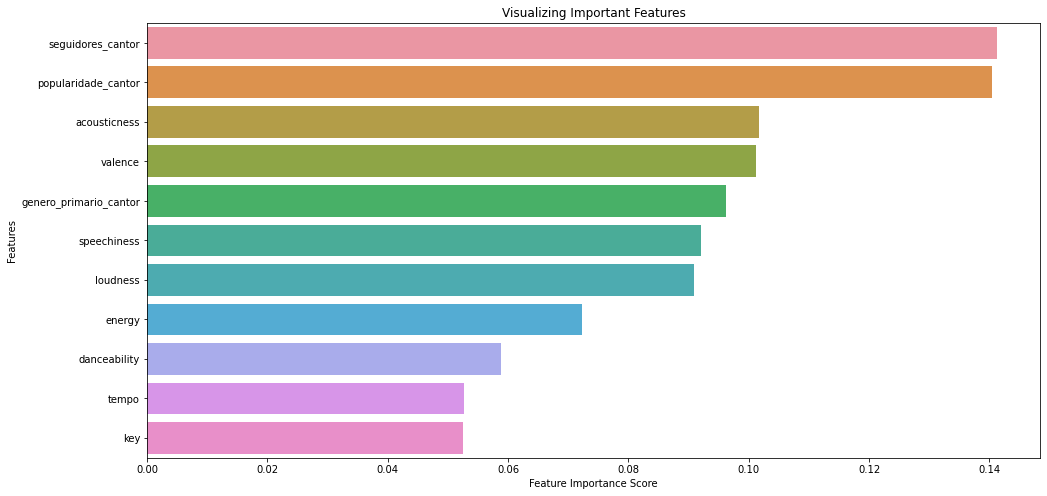

In [97]:
def visualiza_features_importantes(features_lista):
    %matplotlib inline

    plt.figure(figsize=(16,8))
    sns.barplot(x=features_lista, y=features_lista.index)

    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    plt.show()
    
visualiza_features_importantes(feature_imp)

In [98]:
print("Número de árvores da floresta: {}".format(len(rf.estimators_)))
print("Árvores floresta gerada:")
for tree in rf.estimators_:
    print("\nNumero de nós: {}".format(tree.tree_.node_count))
    print("Profundidade da árvore: {}".format(tree.tree_.max_depth))
    print("Features importantes: {}".format(tree.feature_importances_))
    print("\nObjeto: {}".format(tree))

Número de árvores da floresta: 100
Árvores floresta gerada:

Numero de nós: 95
Profundidade da árvore: 20
Features importantes: [1.02324757e-14 1.21251702e-02 1.02353805e-02 1.53570730e-01
 8.62105455e-02 1.18018260e-01 1.19193410e-01 4.40344804e-02
 1.25345324e-01 1.99750327e-01 1.31516371e-01]

Objeto: DecisionTreeClassifier(max_depth=20, max_features='auto', min_samples_leaf=3,
                       random_state=209652396)

Numero de nós: 167
Profundidade da árvore: 20
Features importantes: [0.04463454 0.10598911 0.12882539 0.05848053 0.09252694 0.07396673
 0.07025192 0.06793279 0.09160722 0.18857479 0.07721002]

Objeto: DecisionTreeClassifier(max_depth=20, max_features='auto', min_samples_leaf=3,
                       random_state=398764591)

Numero de nós: 155
Profundidade da árvore: 20
Features importantes: [0.06075878 0.08140181 0.0421693  0.07314716 0.11829328 0.16690341
 0.16920142 0.07537698 0.10068333 0.05500665 0.05705787]

Objeto: DecisionTreeClassifier(max_depth=20, max

In [99]:
tree0 = rf.estimators_[0]

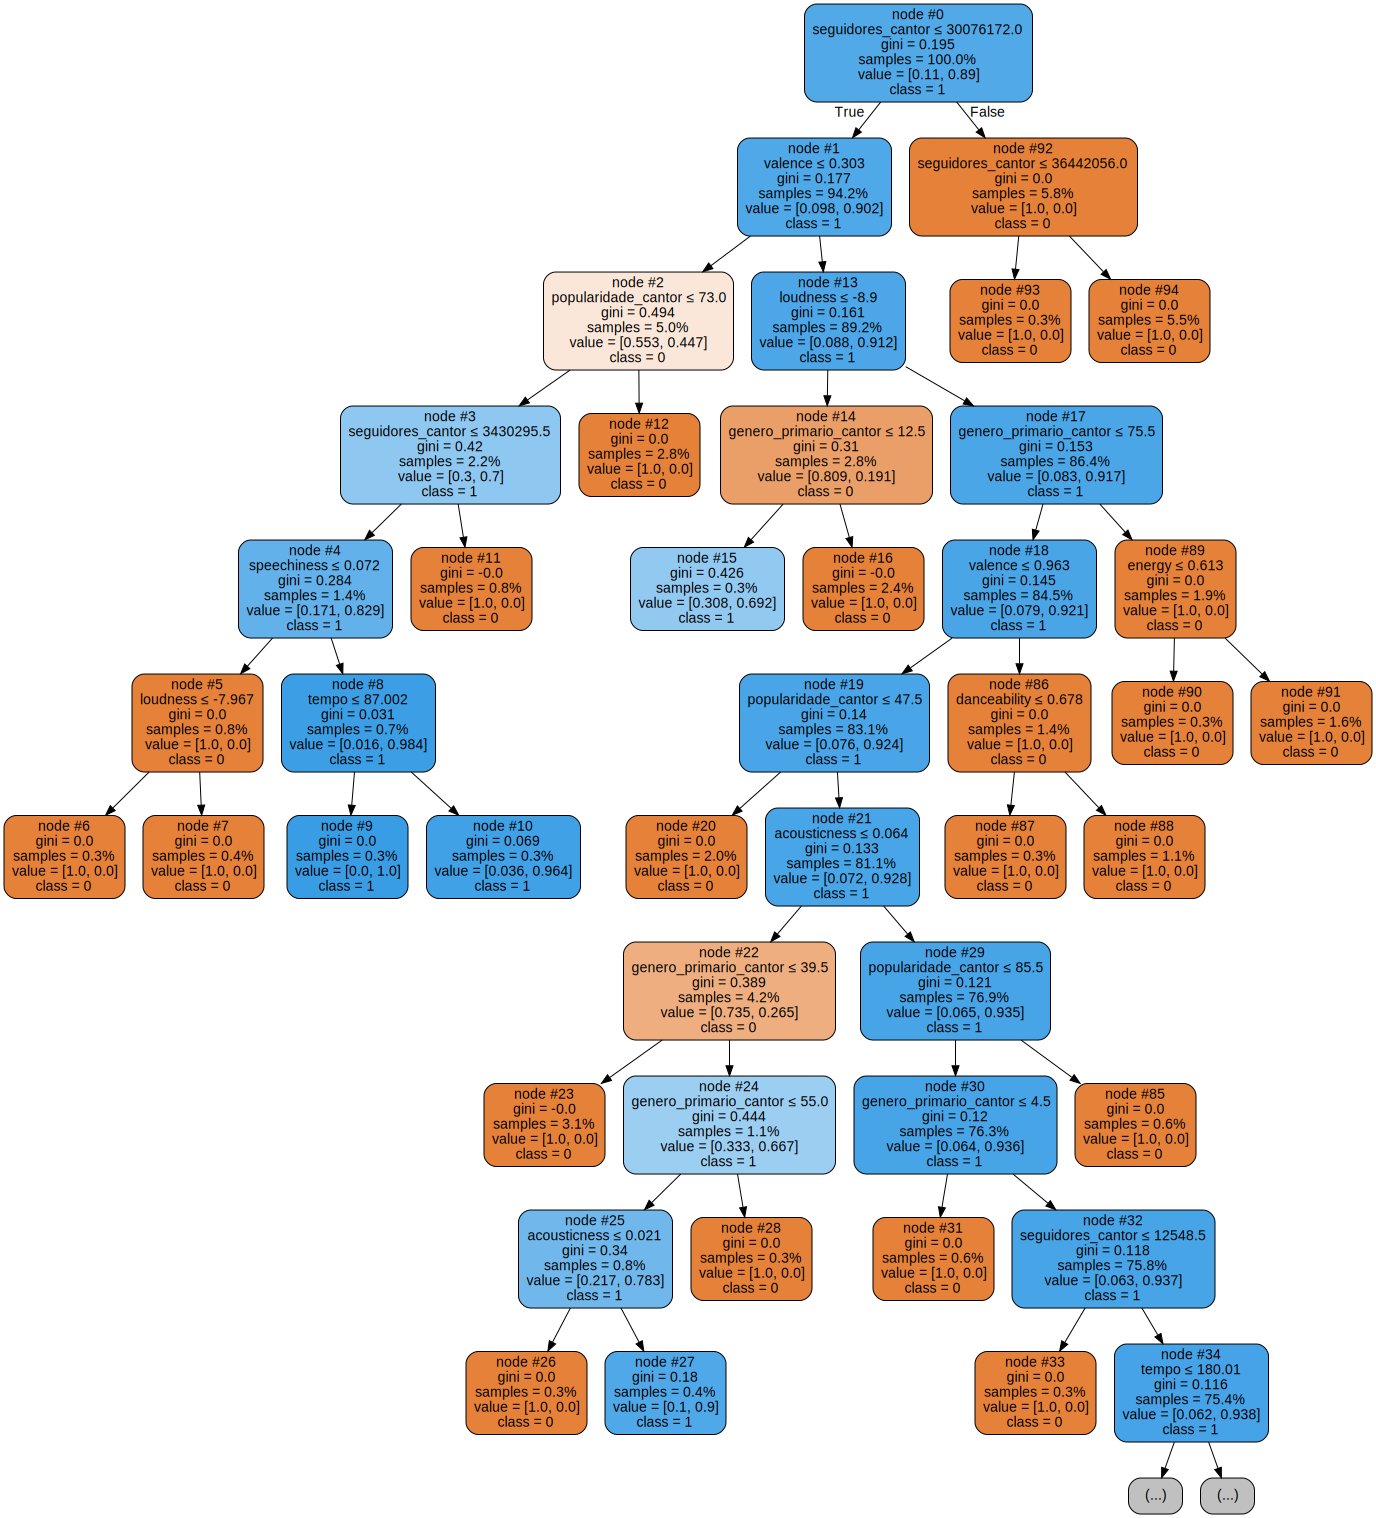

In [100]:
from sklearn.tree import export_graphviz
import graphviz 

dot_data = export_graphviz(
         tree0,
         max_depth=10,
         out_file=None,
         feature_names=features_names,
         class_names=['0','1'], 
         filled=True, rounded=True,
         proportion=True,
         node_ids=True,
         rotate=False,
         label='all',
         special_characters=True
        )  
graph = graphviz.Source(dot_data)  
graph

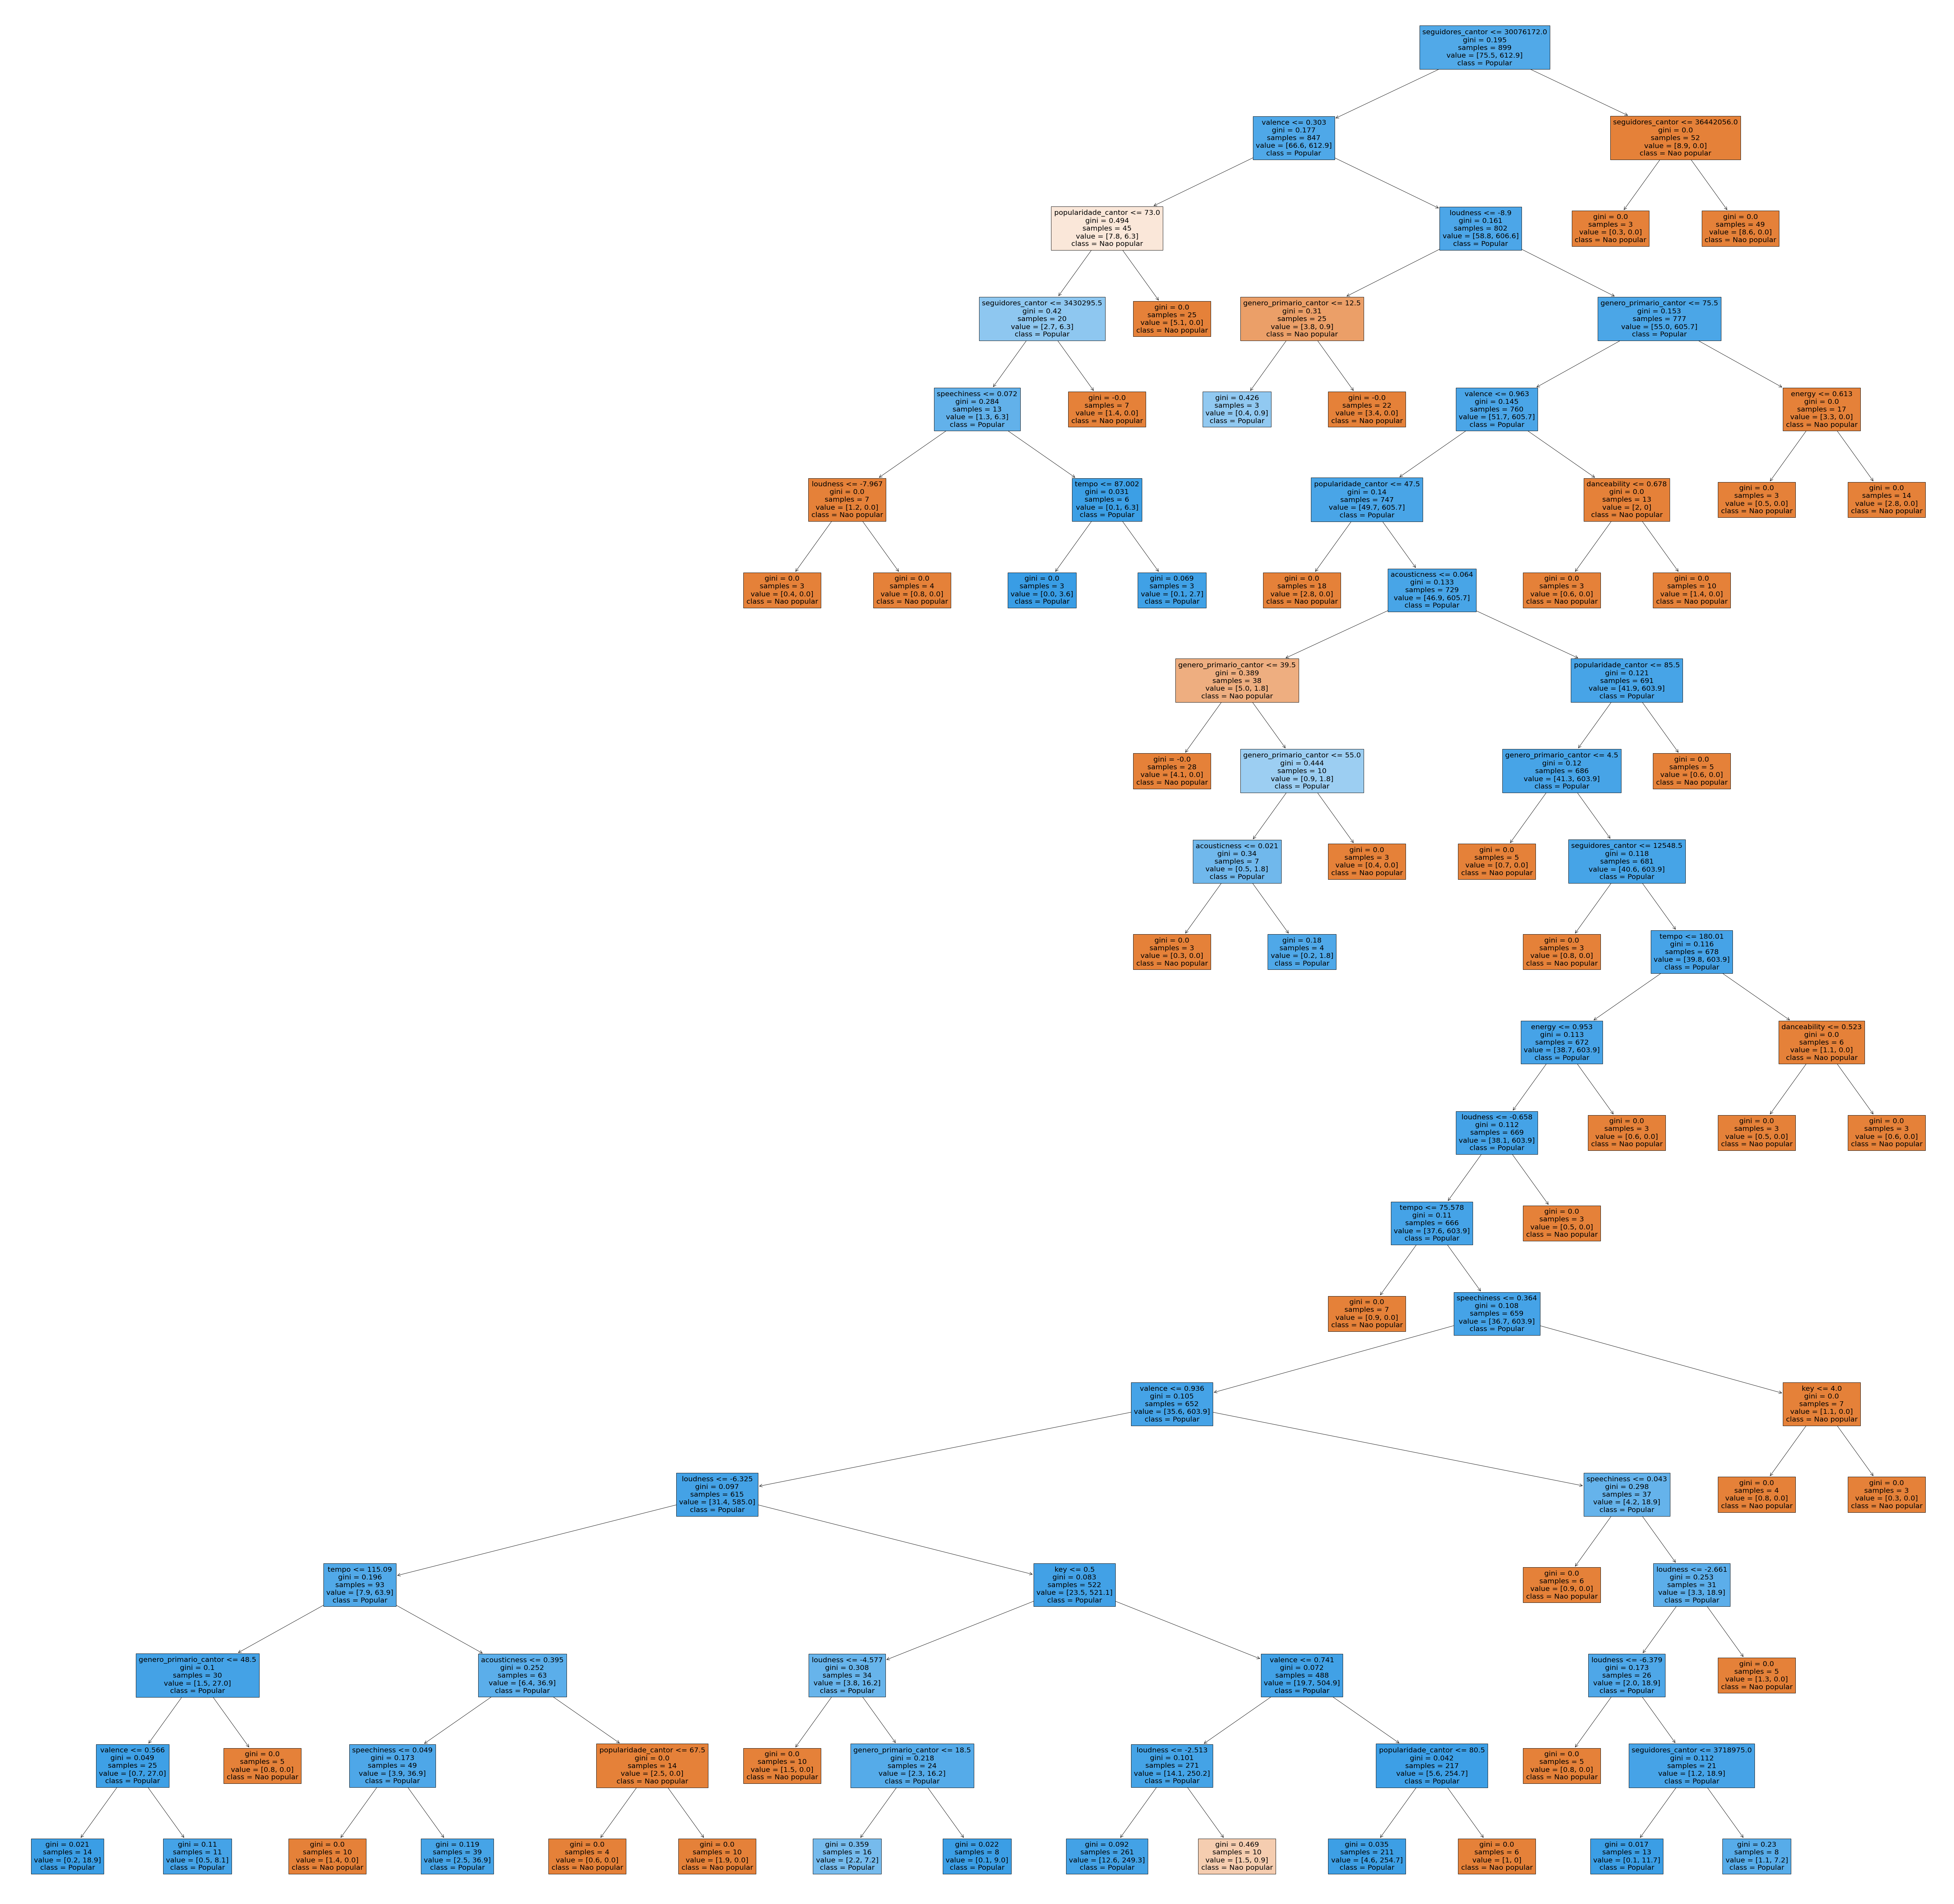

In [101]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

text_representation = tree.export_text(tree0)

fig = plt.figure(figsize=(100,100))
_ = tree.plot_tree(tree0, 
                   feature_names=features_names,  
                   class_names=class_names,
                   filled=True)

# 9 Information Value